## **PREVISÃO DO CANCER DE MAMA**

---
Este projeto tem como objetivo, escolher o melhor algoritmo com base nas metricas estatisticas, para ter em retorno a resposta se o câncer é benigno ou
maligno.

https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data

In [ ]:
#importação de bibliotecas
import pandas as pd
import numpy as np
import plotly.express as px
import seaborn as sns
import scipy.stats as sts
import matplotlib.pyplot as plt


In [ ]:
#importação da base de dados
dados_cancer = pd.read_csv('../data/raw/dados_cancer.csv', sep = ',', encoding = 'iso-8859-1')
#exibição do dataframe
display(dados_cancer.head())
#tamanho do dataframe
dados_cancer.shape


id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0  ...          17.33           184.60      2019.0            0.1622   
1  ...          23.41           158.80      1956.0            0.1238   
2  ...          25.53           152.50      1709.0            0.1444   
3  ...          26.50            98.87       567.7            0.2098   
4  ...          16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

(569, 33)

In [ ]:
dados_cancer.describe()

id  radius_mean  texture_mean  perimeter_mean    area_mean  \
count  5.690000e+02   569.000000    569.000000      569.000000   569.000000   
mean   3.037183e+07    14.127292     19.289649       91.969033   654.889104   
std    1.250206e+08     3.524049      4.301036       24.298981   351.914129   
min    8.670000e+03     6.981000      9.710000       43.790000   143.500000   
25%    8.692180e+05    11.700000     16.170000       75.170000   420.300000   
50%    9.060240e+05    13.370000     18.840000       86.240000   551.100000   
75%    8.813129e+06    15.780000     21.800000      104.100000   782.700000   
max    9.113205e+08    28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  ...  texture_worst  perimeter_worst   area_worst  \
count     569.000000  ...     569.000000       569.000000   569.000000   
mean        0.181162  ...      25.677223       107.261213   880.583128   
std         0.027414  ...       6.146258        33.602542   569.356993   
min         0.106000  ...      12.020000        50.410000   185.200000   
25%         0.161900  ...      21.080000        84.110000   515.300000   
50%         0.179200  ...      25.410000        97.660000   686.500000   
75%         0.195700  ...      29.720000       125.400000  1084.000000   
max         0.304000  ...      49.540000       251.200000  4254.000000   

       smoothness_worst  compactness_worst  concavity_worst  \
count        569.000000         569.000000       569.000000   
mean           0.132369           0.254265         0.272188   
std            0.022832           0.157336         0.208624   
min            0.071170           0.027290         0.000000   
25%            0.116600           0.147200         0.114500   
50%            0.131300           0.211900         0.226700   
75%            0.146000           0.339100         0.382900   
max            0.222600           1.058000         1.252000   

       concave points_worst  symmetry_worst  fractal_dimension_worst  \
count            569.000000      569.000000               569.000000   
mean               0.114606        0.290076                 0.083946   
std                0.065732        0.061867                 0.018061   
min                0.000000        0.156500                 0.055040   
25%                0.064930        0.250400                 0.071460   
50%                0.099930        0.282200                 0.080040   
75%                0.161400        0.317900                 0.092080   
max                0.291000        0.663800                 0.207500   

       Unnamed: 32  
count          0.0  
mean           NaN  
std            NaN  
min            NaN  
25%            NaN  
50%            NaN  
75%            NaN  
max            NaN  

[8 rows x 32 columns]

In [ ]:
#tipos das variaveis
dados_cancer.dtypes
#verificando a quantiade de variaveis nulas no conjunto para cada variavel.
dados_cancer.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

Alvo = diagnosis (object)

previsores = colunas 1 a 31 coluna (float64)

descartaveis = Unnamed: 32 e id (float64)


#**ANALISE DAS VARAIVEIS**
quantidade de valores, valores null, distribuição gráfica

**diagnosis**

M = Maligno - 212 - 37.3%

B = Benigno - 357 - 62.7%

In [ ]:
#quantidade para cada classe
dados_cancer['diagnosis'].value_counts()

diagnosis
B    357
M    212
Name: count, dtype: int64

In [ ]:
#frequencia das classes
frequencia_diagnostico = px.histogram(dados_cancer, x = 'diagnosis', nbins = 60)
frequencia_diagnostico.update_layout(title = 'Distribuição das classes')

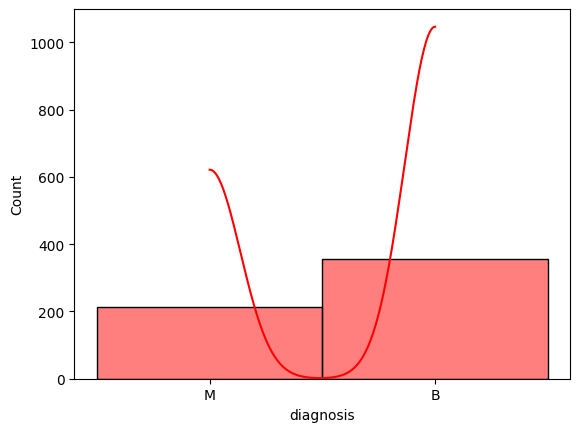

In [ ]:
#curva normal para a frequencia de classes
frequencia_diagnostico_ = sns.histplot(dados_cancer, x = 'diagnosis', bins = 30, color= 'red', kde = True, stat = 'count')

In [ ]:
#porcentagem de frequencia de cada classe
px.pie(dados_cancer, names= 'diagnosis')

**radius_mean**

Distribuição aproximadamente normal (Q-Q PLOT)

Apresentando um total de 14 outliers não tão dispersa entre os registros

In [ ]:
#quantidade de cada valor
dados_cancer['radius_mean'].value_counts().sort_index()

radius_mean
6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: count, Length: 456, dtype: int64

<Axes: xlabel='radius_mean', ylabel='Count'>

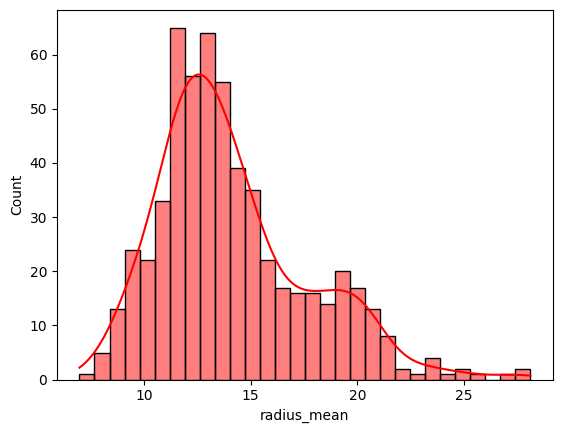

In [ ]:
#frequencia dos valores
sns.histplot(dados_cancer, x = 'radius_mean', bins = 30, color = 'red', kde = True, stat = 'count' )


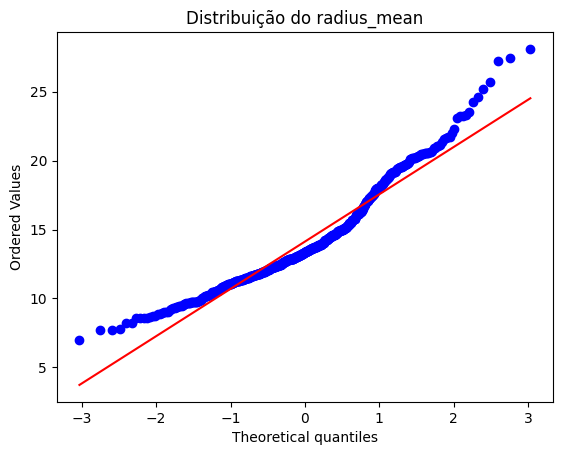

In [ ]:
#distribuição dos registros.
sts.probplot(dados_cancer['radius_mean'],dist = 'norm', plot = plt)
#exibe o Q-Q PLOT e define o titlo
plt.title('Distribuição do radius_mean')
plt.show()

In [ ]:
#outliers sobre os dados
px.box(dados_cancer, y = 'radius_mean')

In [ ]:
#um total de 14 outliers
outliers= dados_cancer[(dados_cancer['radius_mean'] > 21.75)]
outliers['radius_mean'].value_counts().sum()

np.int64(14)

In [ ]:
#descrição estatistica da variavel
dados_cancer['radius_mean'].describe()

count    569.000000
mean      14.127292
std        3.524049
min        6.981000
25%       11.700000
50%       13.370000
75%       15.780000
max       28.110000
Name: radius_mean, dtype: float64

**texture_mean**

Distribuição Aparentemente Normal (Q-Q plot)

Um total de 7 outliers com pouca dispersão


In [ ]:
#frequencia dos dados
dados_cancer['texture_mean'].value_counts().sort_index()

texture_mean
9.71     1
10.38    1
10.72    1
10.82    1
10.89    1
        ..
31.12    1
32.47    1
33.56    1
33.81    1
39.28    1
Name: count, Length: 479, dtype: int64

<Axes: xlabel='texture_mean', ylabel='Count'>

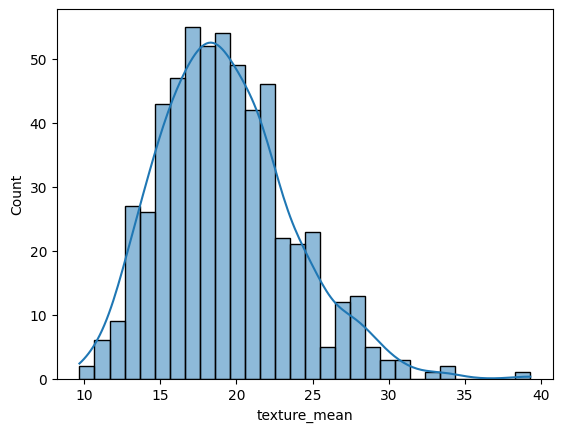

In [ ]:
# analise de frequencia
sns.histplot(dados_cancer, x = 'texture_mean', bins = 30, kde = True, stat= 'count')

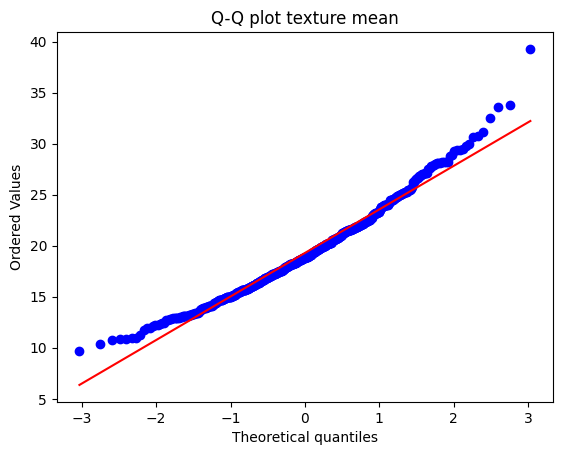

In [ ]:
#Q-Q PLOT
sts.probplot(dados_cancer['texture_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot texture mean')
plt.show()

In [ ]:
#outliers
px.box(dados_cancer, y = 'texture_mean')

In [ ]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['texture_mean'] >  29.97]
outliers['texture_mean'].value_counts().sum()

np.int64(7)

**perimeter_mean**

Distribuição aparetemente normal

13 outliers

In [ ]:
dados_cancer['perimeter_mean'].value_counts().sort_index()

perimeter_mean
43.79     1
47.92     1
47.98     1
48.34     1
51.71     1
         ..
171.50    1
174.20    1
182.10    1
186.90    1
188.50    1
Name: count, Length: 522, dtype: int64

<Axes: xlabel='perimeter_mean', ylabel='Count'>

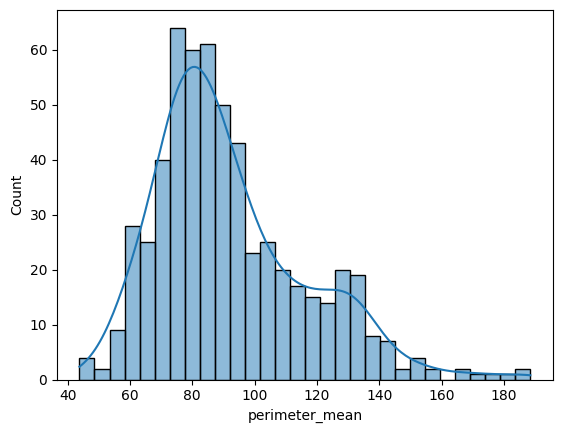

In [ ]:
#
sns.histplot(dados_cancer, x= 'perimeter_mean', bins = 30 ,kde = True, stat = 'count')

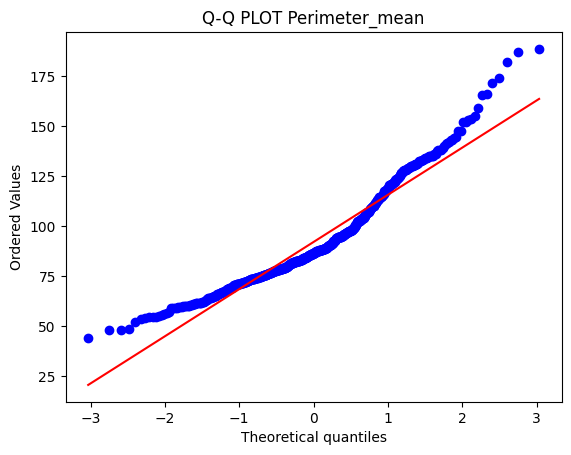

In [ ]:
#qq plot
sts.probplot(dados_cancer['perimeter_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT Perimeter_mean')
plt.show()

In [ ]:
#outliers
px.box(dados_cancer, y = 'perimeter_mean')

In [ ]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['perimeter_mean'] > 147.3]
outliers['perimeter_mean'].value_counts().sum()

np.int64(13)

In [ ]:
dados_cancer['perimeter_mean'].describe()

count    569.000000
mean      91.969033
std       24.298981
min       43.790000
25%       75.170000
50%       86.240000
75%      104.100000
max      188.500000
Name: perimeter_mean, dtype: float64

**area_mean**

Aparentemente não segue uma distribuição normal

25 outliers com uma grande dispersão de dados na calda direita



In [ ]:
#frequencias
dados_cancer['area_mean'].value_counts().sort_index()

area_mean
143.5     1
170.4     1
178.8     1
181.0     1
201.9     1
         ..
1878.0    1
2010.0    1
2250.0    1
2499.0    1
2501.0    1
Name: count, Length: 539, dtype: int64

<Axes: xlabel='area_mean', ylabel='Count'>

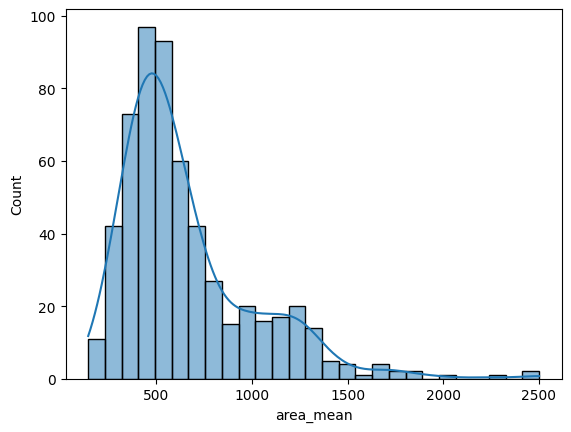

In [ ]:
#frequencia dos dados e curva normal
sns.histplot(dados_cancer, x = 'area_mean', kde = True, stat = 'count')

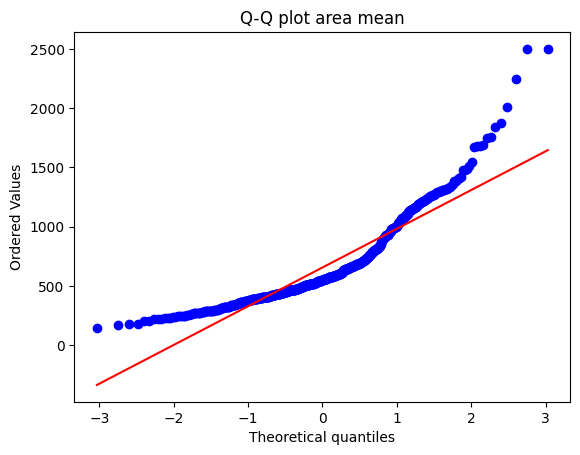

In [ ]:
#Q-Q plot para variabilidade dos dados
sts.probplot(dados_cancer['area_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot area mean')
plt.show()

In [ ]:
#outliers
px.box(dados_cancer, y = 'area_mean')

In [ ]:
#quantidade de outliers
outliers = dados_cancer[dados_cancer['area_mean'] > 1326]
outliers['area_mean'].value_counts().sum()

np.int64(25)

In [ ]:
#descrição estatistica dos dados
dados_cancer['area_mean'].describe()

count     569.000000
mean      654.889104
std       351.914129
min       143.500000
25%       420.300000
50%       551.100000
75%       782.700000
max      2501.000000
Name: area_mean, dtype: float64

**smoothness_mean**


uma provavel distribuição normal


6 outliers no total, 5 ácima do limite superior e 1 àbaixo do limite inferior

In [ ]:
dados_cancer.smoothness_mean.value_counts().sort_index()

smoothness_mean
0.05263    1
0.06251    1
0.06429    1
0.06576    1
0.06613    1
          ..
0.13710    1
0.13980    1
0.14250    1
0.14470    1
0.16340    1
Name: count, Length: 474, dtype: int64

<Axes: xlabel='smoothness_mean', ylabel='Count'>

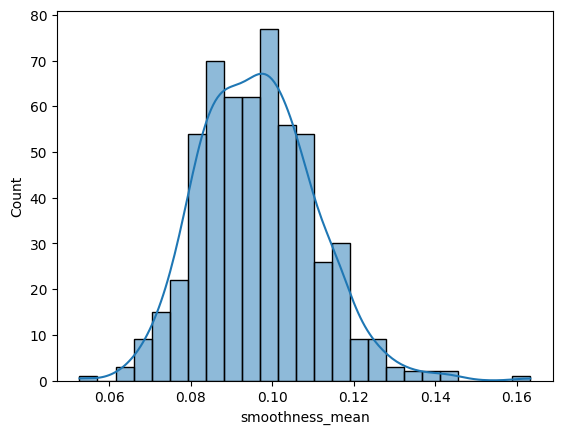

In [ ]:
#
sns.histplot(dados_cancer, x = 'smoothness_mean', kde = True, stat = 'count')

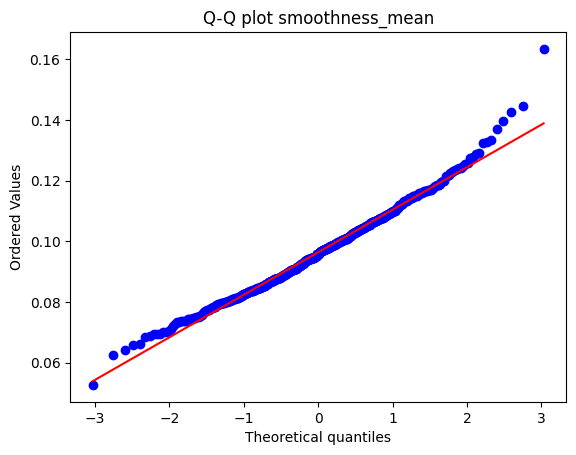

In [ ]:
#distribuição dos dados
sts.probplot(dados_cancer['smoothness_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q plot smoothness_mean')
plt.show()


In [ ]:
#analisando outliers
px.box(dados_cancer, y = 'smoothness_mean')

In [ ]:
# separando para contar
outliers = dados_cancer[(dados_cancer['smoothness_mean'] > 0.1335) | (dados_cancer['smoothness_mean'] < 0.06251)]
#outliers
outliers['smoothness_mean']
#quantidade de outliers
outliers['smoothness_mean'].value_counts().sum()

np.int64(6)

**compactness_mean**

Distribuição aparentemente normal

16 outliers com um variabilidade não tão grande

In [ ]:
dados_cancer['compactness_mean'].value_counts().sort_index()

compactness_mean
0.01938    1
0.02344    1
0.02650    1
0.02675    1
0.03116    1
          ..
0.28320    1
0.28390    1
0.28670    1
0.31140    1
0.34540    1
Name: count, Length: 537, dtype: int64

<Axes: xlabel='compactness_mean', ylabel='Count'>

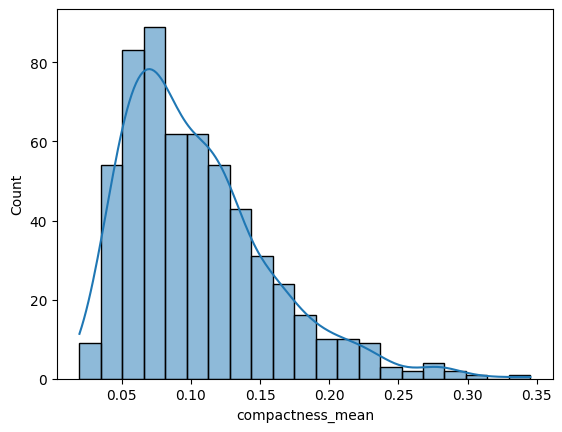

In [ ]:
sns.histplot(dados_cancer, x = 'compactness_mean', kde = True, stat = 'count')

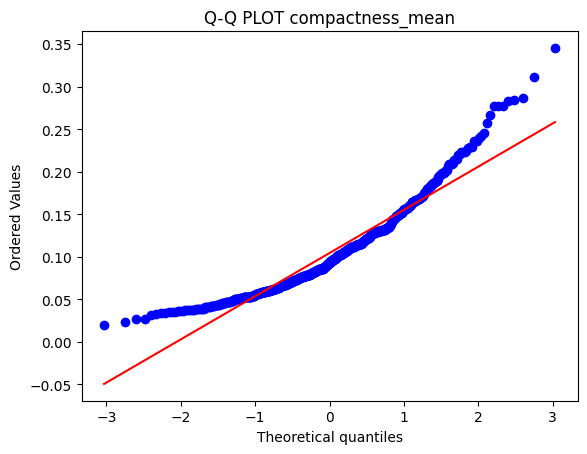

In [ ]:
sts.probplot(dados_cancer['compactness_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT compactness_mean')
plt.show()

In [ ]:
px.box(dados_cancer, y = 'compactness_mean')

In [ ]:
outliers = dados_cancer[dados_cancer['compactness_mean'] > 0.2284]
outliers['compactness_mean']
outliers['compactness_mean'].value_counts().sum()

np.int64(16)

**concavity_mean**

Distribuição aparentemente não normal

0 valores nulos

18 outliers ácima do limte superior, grande variabilidade de valor nos outliers

In [ ]:
dados_cancer['concavity_mean'].value_counts().sort_index()


concavity_mean
0.000000    13
0.000692     1
0.000974     1
0.001194     1
0.001461     1
            ..
0.363500     1
0.375400     1
0.410800     1
0.426400     1
0.426800     1
Name: count, Length: 537, dtype: int64

In [ ]:
print('quantidade de registros nulos: {}'.format(dados_cancer['concavity_mean'].isnull().sum()))

quantidade de registros nulos: 0


<Axes: xlabel='concavity_mean', ylabel='Count'>

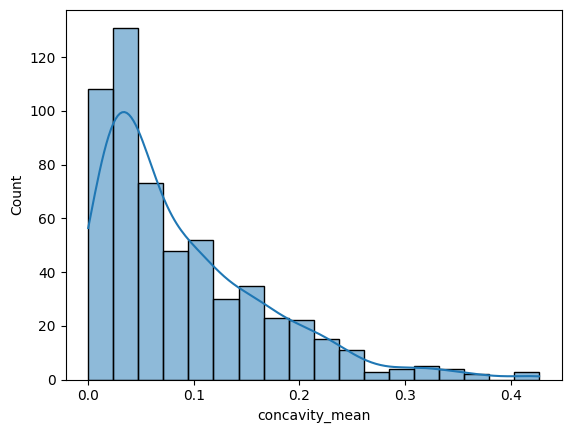

In [ ]:
sns.histplot(dados_cancer,x = 'concavity_mean',kde = True, stat = 'count')

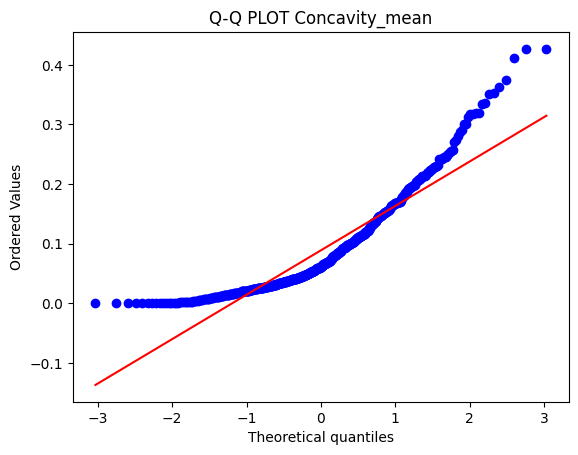

In [ ]:
sts.probplot(dados_cancer['concavity_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT Concavity_mean')
plt.show()

In [ ]:
#analisando os outliers
px.box(dados_cancer, y ='concavity_mean')

In [ ]:
#outliers, quantidade de outliers e os registros outliars
outliers = dados_cancer[dados_cancer['concavity_mean'] > 0.281]
outliers['concavity_mean']
outliers['concavity_mean'].value_counts().sum()



np.int64(18)

In [ ]:
#metricas estatisticas
dados_cancer['concavity_mean'].describe()

count    569.000000
mean       0.088799
std        0.079720
min        0.000000
25%        0.029560
50%        0.061540
75%        0.130700
max        0.426800
Name: concavity_mean, dtype: float64

**concave points_mean**

Distribuição aparentemente não normal

total de 10 outliers com uma grande variabilidade no valor dos registros na extremidade direita

In [ ]:
#frequencia dos valores
dados_cancer['concave points_mean'].value_counts()

concave points_mean
0.000000    13
0.028640     3
0.057780     2
0.124200     2
0.147100     2
            ..
0.066180     1
0.045620     1
0.088780     1
0.065260     1
0.002404     1
Name: count, Length: 542, dtype: int64

In [ ]:
#verificando existencia de valores nulos
dados_cancer['concave points_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_mean', ylabel='Count'>

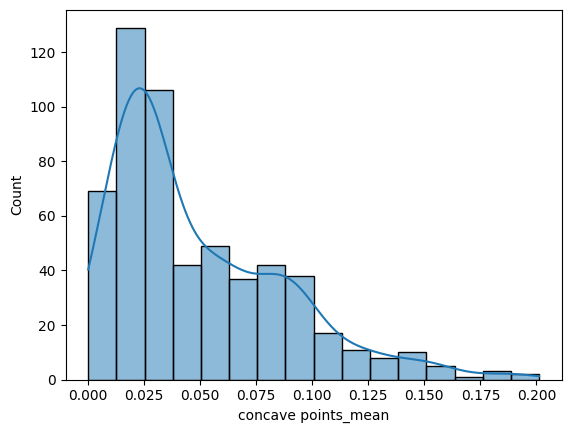

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_mean', kde = True, stat = 'count')

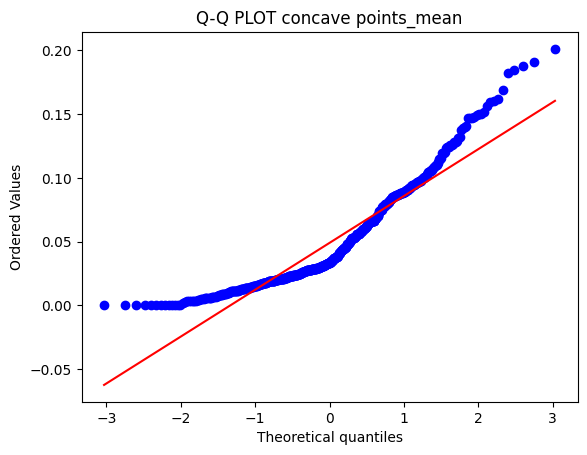

In [ ]:
#Q-Q PLOT para analisar a possivel normalidade dos dados
sts.probplot(dados_cancer['concave points_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_mean')
plt.show()


In [ ]:
#analise de outliers
px.box(dados_cancer, y = 'concave points_mean')

In [ ]:
#outliers presentes e sua quantidade
outliers = dados_cancer[dados_cancer['concave points_mean'] > 0.152]
outliers['concave points_mean']
outliers['concave points_mean'].value_counts().sum()


np.int64(10)

**Symmetry_Mean**

Grande probabilidade de seguir uma distribuição normal

15 outliers, 1 no limite inferior e 14 a cima limite superior, pouca variabilidade no valor dos registros, 0 valores nulos

In [ ]:
#fraquencia dos valores
dados_cancer['symmetry_mean'].value_counts()

symmetry_mean
0.1601    4
0.1769    4
0.1717    4
0.1893    4
0.1714    4
         ..
0.2384    1
0.1703    1
0.1167    1
0.2395    1
0.2251    1
Name: count, Length: 432, dtype: int64

In [ ]:
#buscando valores nulos na coluna
dados_cancer['symmetry_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_mean', ylabel='Count'>

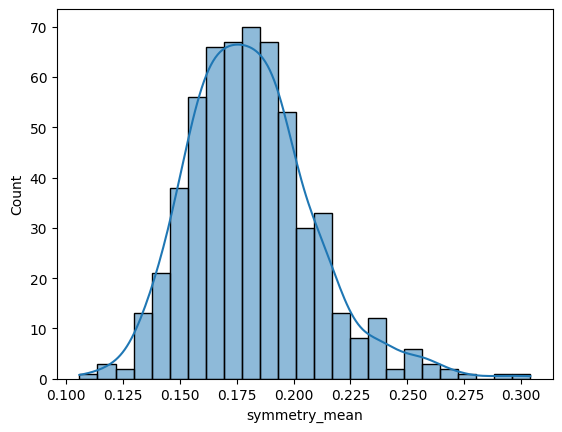

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_mean', kde = True, stat = 'count')

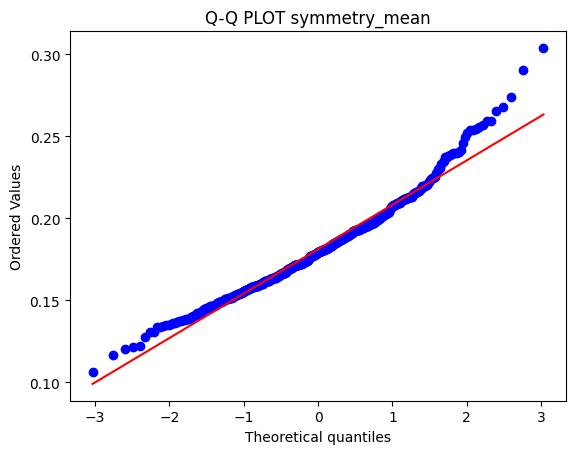

In [ ]:
#Q-Q PLOT
sts.probplot(dados_cancer['symmetry_mean'], dist= 'norm', plot = plt)
plt.title('Q-Q PLOT symmetry_mean')
plt.show()

In [ ]:
px.box(dados_cancer, y = 'symmetry_mean')

In [ ]:
#outliers e quantidade
outliers = dados_cancer[(dados_cancer['symmetry_mean'] > 0.2459) | (dados_cancer['symmetry_mean'] < 0.1167)]
outliers['symmetry_mean']
outliers['symmetry_mean'].value_counts().sum()


np.int64(15)

**fractal_dimension_mean**

Distribuição aparentemente normal

10 outliers para o limite superior pouca variabilidade no valor dos registros

In [ ]:
#frequencia dos registros
dados_cancer.fractal_dimension_mean.value_counts().sort_values()

fractal_dimension_mean
0.06066    1
0.07032    1
0.05278    1
0.06330    1
0.07413    1
          ..
0.06782    3
0.06113    3
0.05907    3
0.05667    3
0.05913    3
Name: count, Length: 499, dtype: int64

In [ ]:
#valores nulos
dados_cancer.fractal_dimension_mean.isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_mean', ylabel='Count'>

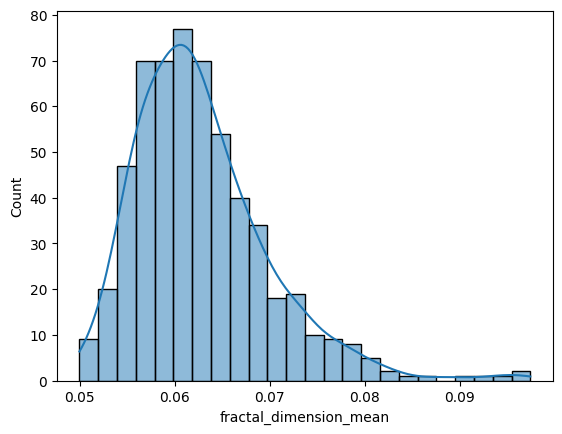

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x='fractal_dimension_mean', kde = True, stat = 'count')

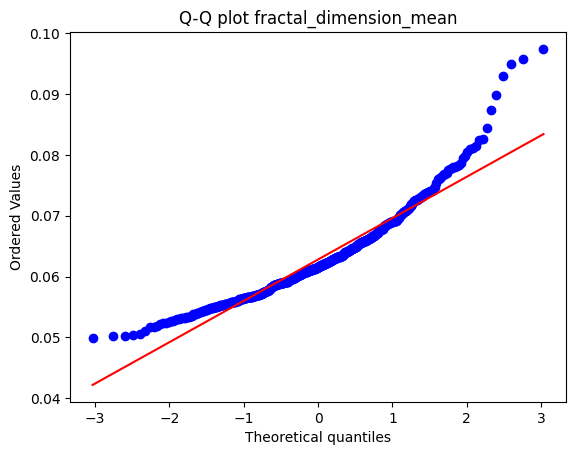

In [ ]:
#Q-Q plot para analisar a distribuição do dados com relação a reta
sts.probplot(dados_cancer.fractal_dimension_mean, dist = 'norm', plot = plt)
plt.title('Q-Q plot fractal_dimension_mean')
plt.show()

In [ ]:
#outliers
px.box(dados_cancer,  y = 'fractal_dimension_mean')

In [ ]:
#outliers e soma de outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_mean'] > 0.07871]
outliers.fractal_dimension_mean
outliers.fractal_dimension_mean.value_counts().sum()

np.int64(15)

**radius mean**

Distribuição aparentemente normal

14 outliers no limite superior, pouca variabilidade nos valores dos registros, 0 valores nulos

In [ ]:
#frequencia dos registos
dados_cancer['radius_mean'].value_counts().sort_index()

radius_mean
6.981     1
7.691     1
7.729     1
7.760     1
8.196     1
         ..
25.220    1
25.730    1
27.220    1
27.420    1
28.110    1
Name: count, Length: 456, dtype: int64

In [ ]:
#valores missing
dados_cancer['radius_mean'].isnull().sum()

np.int64(0)

<Axes: xlabel='radius_mean', ylabel='Count'>

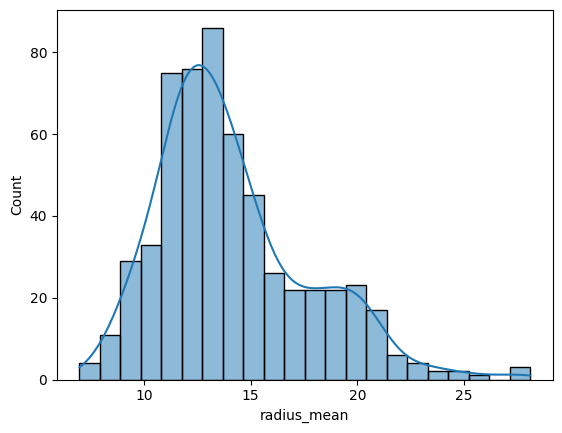

In [ ]:
sns.histplot(dados_cancer, x = 'radius_mean', kde = True, stat = 'count')

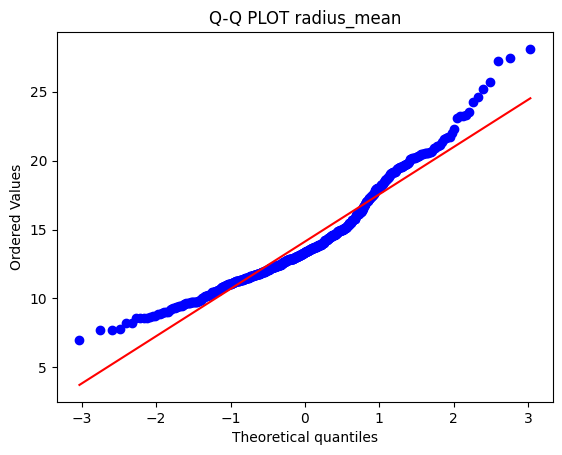

In [ ]:
sts.probplot(dados_cancer['radius_mean'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT radius_mean')
plt.show()

In [ ]:
px.box(dados_cancer, y = 'radius_mean')

In [ ]:
outliers = dados_cancer[dados_cancer['radius_mean'] > 21.75]
outliers.radius_mean
outliers.radius_mean.value_counts().sum()

np.int64(14)

**texture_se**

Distribuição aproximadamento normal

20 outliers no limite superior, variabilidade do valor nos registros não tão alta, 0 valores missing

In [ ]:
#frequencia dos valores
dados_cancer['texture_se'].value_counts().sort_index()

texture_se
0.3602    1
0.3621    1
0.3628    1
0.3871    1
0.3981    1
         ..
3.1200    1
3.5680    1
3.6470    1
3.8960    1
4.8850    1
Name: count, Length: 519, dtype: int64

In [ ]:
#valores missing
dados_cancer.texture_se.isnull().sum()

np.int64(0)

<Axes: xlabel='texture_se', ylabel='Count'>

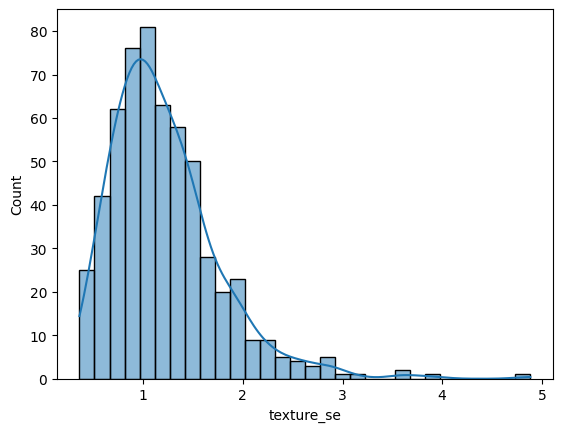

In [ ]:
sns.histplot(dados_cancer, x = 'texture_se', kde = True, stat = 'count')

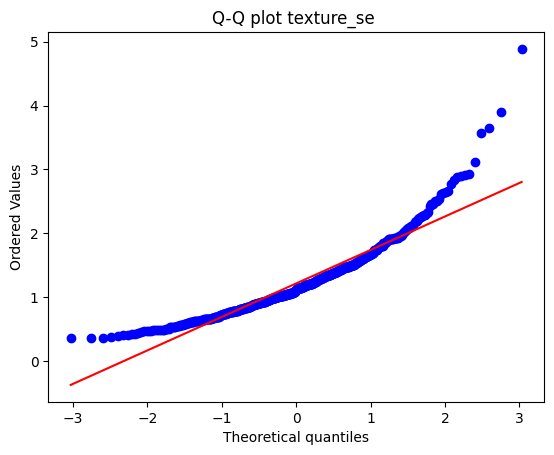

In [ ]:
sts.probplot(dados_cancer['texture_se'], dist = 'norm', plot = plt)
plt.title('Q-Q plot texture_se ')
plt.show()

In [ ]:
px.box(dados_cancer, y = 'texture_se')

In [ ]:
outliers = dados_cancer[dados_cancer['texture_se'] > 2.426]
outliers.texture_se
outliers.texture_se.value_counts().sum()

np.int64(20)

**parimeter_se**
Aparentemente não segue uma distribuição normal

38 outliers acima do limite superior, com uma grande variabilidade no valor do registros, uma grande cauda a direita

In [ ]:
#
dados_cancer['perimeter_se'].value_counts()

perimeter_se
1.778    4
3.008    2
1.959    2
1.566    2
2.097    2
        ..
1.742    1
1.817    1
2.680    1
1.344    1
2.308    1
Name: count, Length: 533, dtype: int64

In [ ]:
#checando valroes nulos
dados_cancer['perimeter_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='perimeter_se', ylabel='Count'>

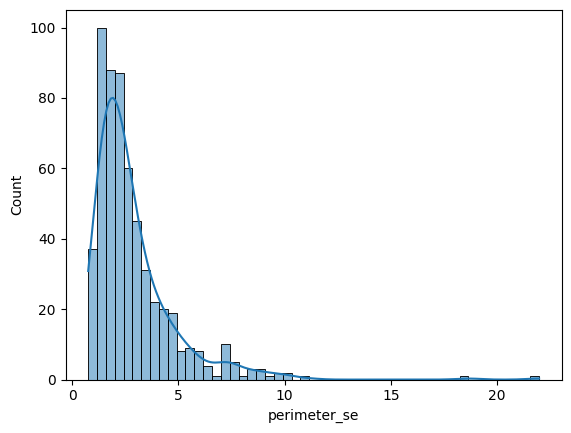

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'perimeter_se', kde = True, stat = 'count')


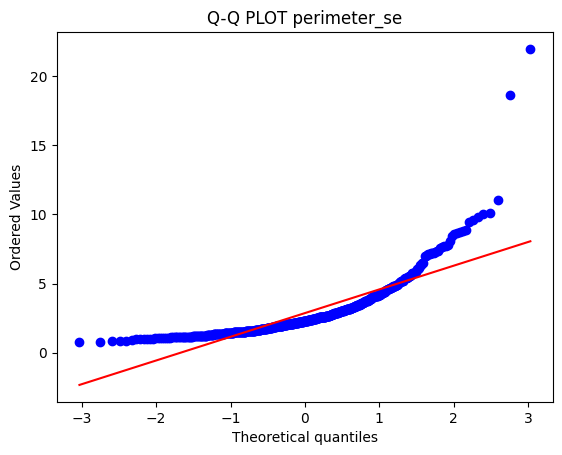

In [ ]:
#QQ plot
sts.probplot(dados_cancer['perimeter_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT perimeter_se')
plt.show()

In [ ]:
px.box(dados_cancer, y = 'perimeter_se')

In [ ]:
outliers = dados_cancer[dados_cancer['perimeter_se'] > 5.865]
outliers.perimeter_se
outliers.perimeter_se.value_counts().sum()

np.int64(38)

In [ ]:
dados_cancer.perimeter_se.describe()

count    569.000000
mean       2.866059
std        2.021855
min        0.757000
25%        1.606000
50%        2.287000
75%        3.357000
max       21.980000
Name: perimeter_se, dtype: float64

**area_se**

Aparentemente segue uma distribuição não normal

contendo 64 outliers no limite superior, uma grande variabilidade no valor do limite superior até o ultimo outlier, 0 valores nulos.

In [ ]:
#frequencia
dados_cancer['area_se'].value_counts().sort_values()

area_se
17.72    1
72.44    1
15.07    1
13.24    1
87.17    1
        ..
18.24    2
16.97    3
18.54    3
17.67    3
16.64    3
Name: count, Length: 528, dtype: int64

In [ ]:
#checando valores nulos
dados_cancer['area_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='area_se', ylabel='Count'>

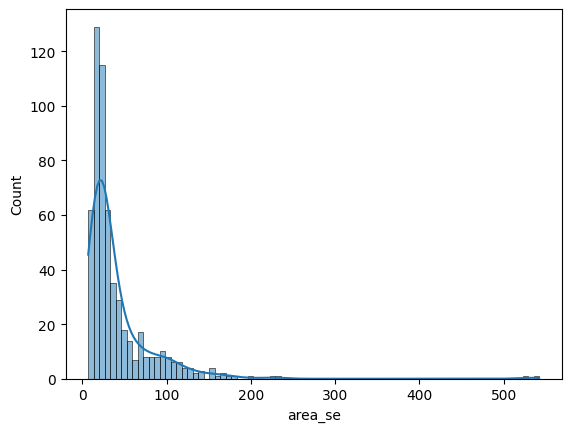

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'area_se', kde = True, stat = 'count')

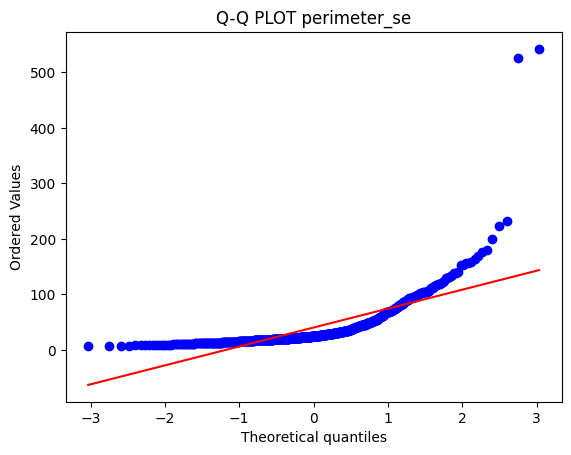

In [ ]:
#QQ plot
sts.probplot(dados_cancer['area_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT perimeter_se')
plt.show()

In [ ]:
px.box(dados_cancer, y = 'area_se')

In [ ]:
outliers = dados_cancer[dados_cancer['area_se'] > 86.22]
outliers.area_se
outliers.area_se.value_counts().sum()

np.int64(64)

**smoothness_se**

Aparentemente segue uma distribuição normal

com 29 outliers no limite superior, uma baixa variabilidade nos valores do registros e 0 valores nulos.

In [ ]:
#frequencia
dados_cancer.smoothness_se.value_counts().sort_values()

smoothness_se
0.009853    1
0.007257    1
0.005608    1
0.005498    1
0.005783    1
           ..
0.010520    2
0.007514    2
0.006494    2
0.006399    2
0.005910    2
Name: count, Length: 547, dtype: int64

In [ ]:
#checando valores nulos
dados_cancer['smoothness_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='smoothness_se', ylabel='Count'>

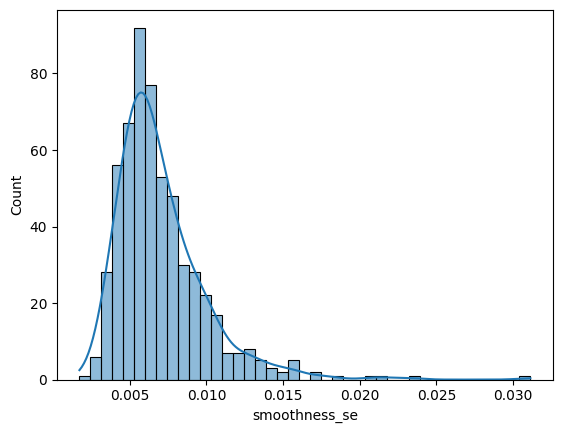

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer,x = 'smoothness_se', kde = True, stat = 'count')

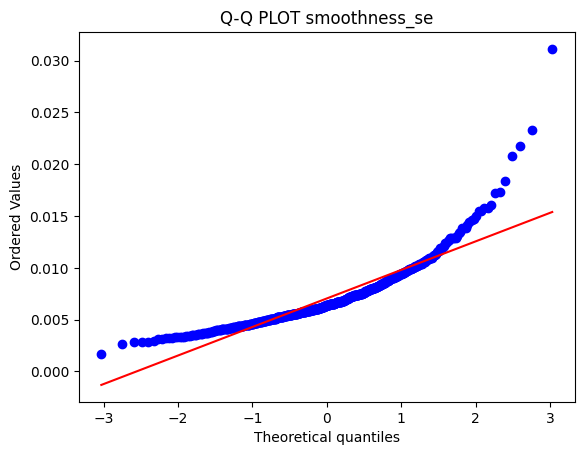

In [ ]:
#QQ plot
sts.probplot(dados_cancer['smoothness_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT smoothness_se')
plt.show()

In [ ]:
px.box(dados_cancer, y = 'smoothness_se')

In [ ]:
outliers = dados_cancer[dados_cancer['smoothness_se'] > 0.01262]
outliers.smoothness_se
outliers.smoothness_se.value_counts().sum()

np.int64(29)

In [ ]:
dados_cancer['smoothness_se'].describe()

count    569.000000
mean       0.007041
std        0.003003
min        0.001713
25%        0.005169
50%        0.006380
75%        0.008146
max        0.031130
Name: smoothness_se, dtype: float64

**compactness_se**

Distribuição não aparente seguir normalidade, com uma cauda muito grande para a direita

28 outliers para o limite superior, com uma grande variabilidade entre o valor dos registros.

In [ ]:
#frequencia dos valores
dados_cancer['compactness_se'].value_counts().sort_values()

compactness_se
0.07458    1
0.05328    1
0.01432    1
0.01898    1
0.01460    1
          ..
0.01382    2
0.01819    2
0.01812    3
0.01104    3
0.02310    3
Name: count, Length: 541, dtype: int64

In [ ]:
#quantidade de valores nulos
dados_cancer['compactness_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='compactness_se', ylabel='Count'>

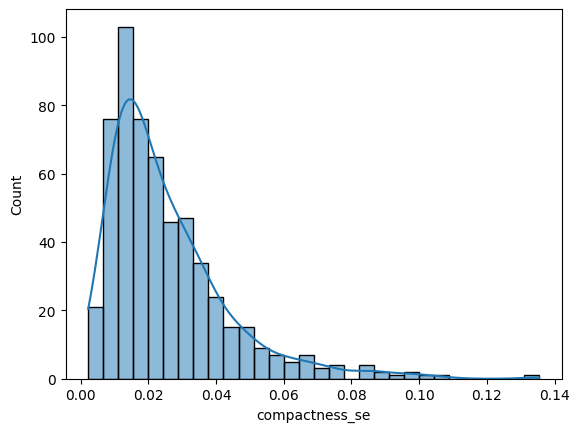

In [ ]:
#histograma com curva de normalidade
sns.histplot(dados_cancer,x = 'compactness_se', kde = True,bins = 30,stat = 'count')

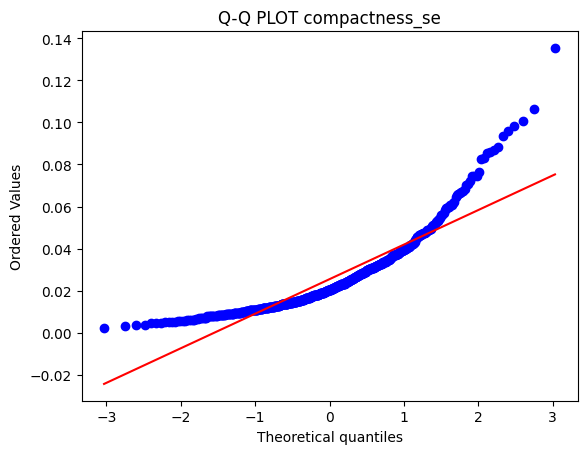

In [ ]:
#Q-Q plot
sts.probplot(dados_cancer['compactness_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT compactness_se')
plt.show()

In [ ]:
#outliers e quartis
px.box(dados_cancer, y = 'compactness_se')

In [ ]:
outliers = dados_cancer[dados_cancer['compactness_se']> 0.06063]
outliers.compactness_se
outliers.compactness_se.value_counts().sum()

np.int64(28)

**concavity_se**
Distribuição aparentemente normal, cauda grade a direita

22 outliers para o limite superior, com uma variabilidade baixa na dispersão dos dados

In [ ]:
#frequencia
dados_cancer['concavity_se'].value_counts().sort_index()

concavity_se
0.000000    13
0.000692     1
0.000793     1
0.000974     1
0.001128     1
            ..
0.143500     1
0.143800     1
0.153500     1
0.303800     1
0.396000     1
Name: count, Length: 533, dtype: int64

In [ ]:
#valores nulos
dados_cancer['concavity_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='concavity_se', ylabel='Count'>

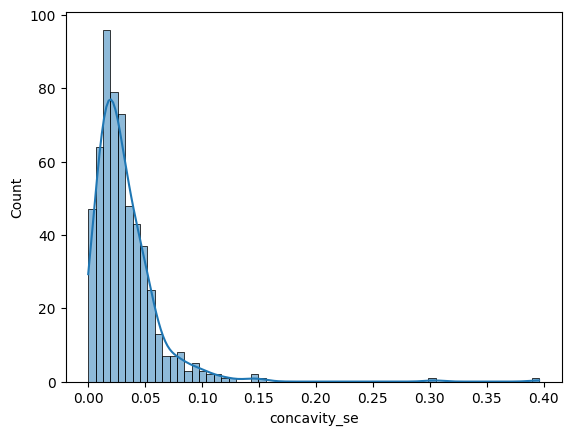

In [ ]:
#hsitograma com curva normal
sns.histplot(dados_cancer, x = 'concavity_se', kde = True, stat = 'count')

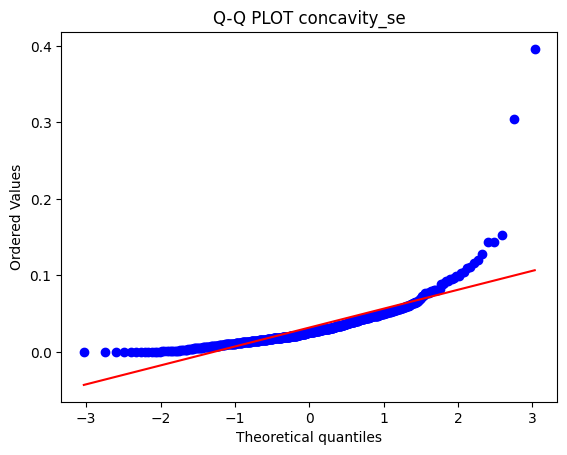

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['concavity_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concavity_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concavity_se')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['concavity_se'] > 0.08232]
outliers.concavity_se
outliers.concavity_se.value_counts().sum()

np.int64(22)

**concave points_se**

Distribuição aparentemente normal, unicaldal a direita

18 outliers para o limite superior e pouca variabilidade na dispersão dos dados

In [ ]:
#frequencia
dados_cancer['concave points_se'].value_counts().sort_index()

concave points_se
0.000000    13
0.001852     1
0.002386     1
0.002404     1
0.002924     1
            ..
0.034410     1
0.034870     1
0.039270     1
0.040900     1
0.052790     1
Name: count, Length: 507, dtype: int64

In [ ]:
#valores nulos
dados_cancer['concave points_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_se', ylabel='Count'>

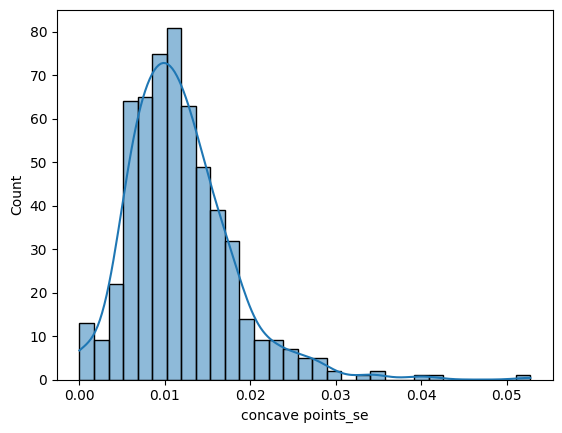

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_se', kde = True, stat = 'count')

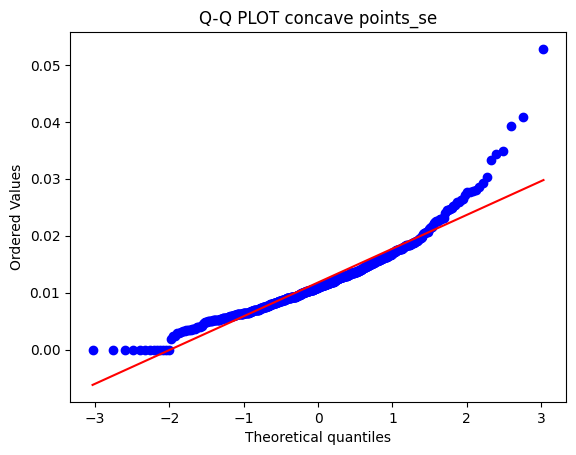

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['concave points_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concave points_se')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['concave points_se'] > 0.02536]
outliers['concave points_se']
outliers['concave points_se'].value_counts().sum()

np.int64(18)

**symmetry_se**

Acredito que não siga uma distribuição normal, 0 valores nulos

27 outliers para o limite superior, variabilidade não muito alta para a dispersão dos dados

In [ ]:
#frequencia
dados_cancer['symmetry_se'].value_counts().sort_index()

symmetry_se
0.007882    1
0.009539    1
0.009947    1
0.010130    1
0.010290    1
           ..
0.055430    1
0.056280    1
0.059630    1
0.061460    1
0.078950    1
Name: count, Length: 498, dtype: int64

In [ ]:
#valores nulos
dados_cancer['symmetry_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_se', ylabel='Count'>

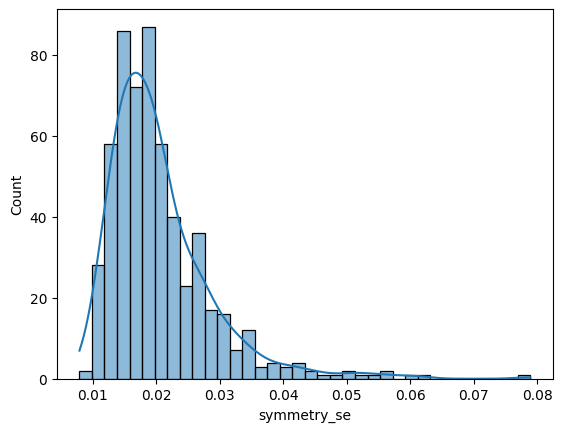

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_se', kde = True, stat = 'count')

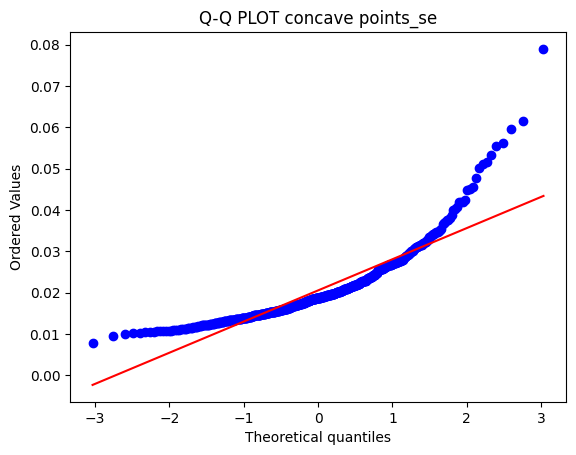

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['symmetry_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'symmetry_se')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['symmetry_se'] > 0.03546]
outliers['symmetry_se']
outliers['symmetry_se'].value_counts().sum()

np.int64(27)

**fractal_dimension_se**

Distribuição aparentemente normal, 0 valores nulos

28 outliers para o limite superior, pouca variabilidade na dispersão do dados

In [ ]:
#frequencia de valores
dados_cancer['fractal_dimension_se'].value_counts().sort_values()

fractal_dimension_se
0.003742    1
0.004076    1
0.001708    1
0.001465    1
0.005984    1
           ..
0.001971    2
0.004005    2
0.003002    2
0.001956    2
0.001976    2
Name: count, Length: 545, dtype: int64

In [ ]:
#valores nulos
dados_cancer['fractal_dimension_se'].isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_se', ylabel='Count'>

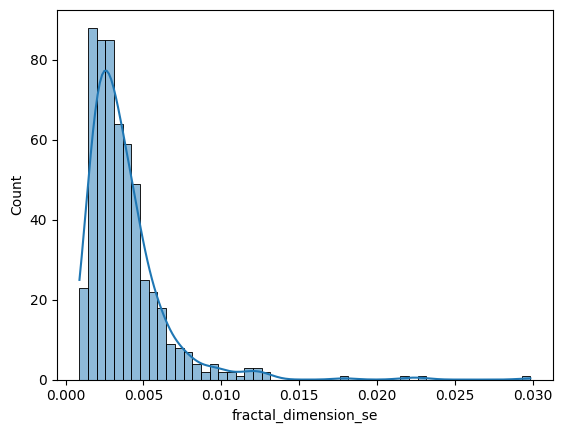

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'fractal_dimension_se', kde = True, stat = 'count')

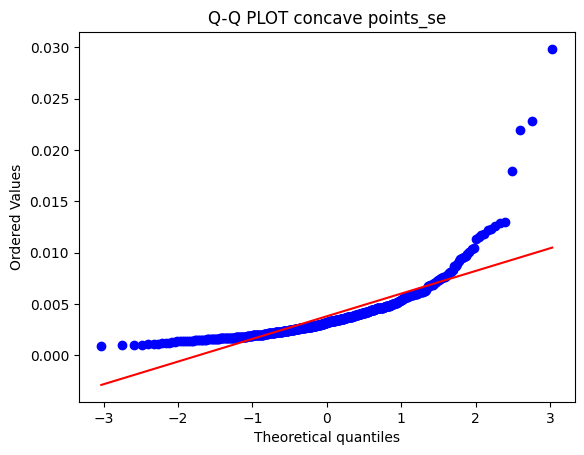

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['fractal_dimension_se'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'fractal_dimension_se')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_se'] > 0.008015]
outliers['fractal_dimension_se']
outliers['fractal_dimension_se'].value_counts().sum()

np.int64(28)

**radius_worst**

Distribuição aparentemente normal, 0 valores nulos

28 outliers para o limite superior, pouca variabilidade na dispersão dos dados

In [ ]:
#frequencia de valores
dados_cancer['radius_worst'].value_counts().sort_values()

radius_worst
9.414     1
8.964     1
22.820    1
16.230    1
24.090    1
         ..
16.110    3
14.910    3
13.500    4
13.340    4
12.360    5
Name: count, Length: 457, dtype: int64

In [ ]:
#valores nulos
dados_cancer['radius_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='radius_worst', ylabel='Count'>

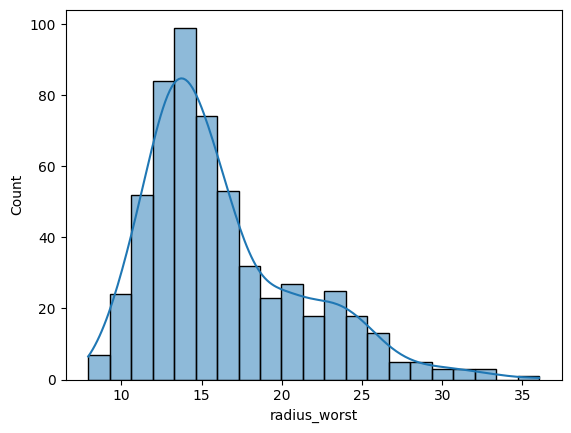

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'radius_worst', kde = True, stat = 'count')

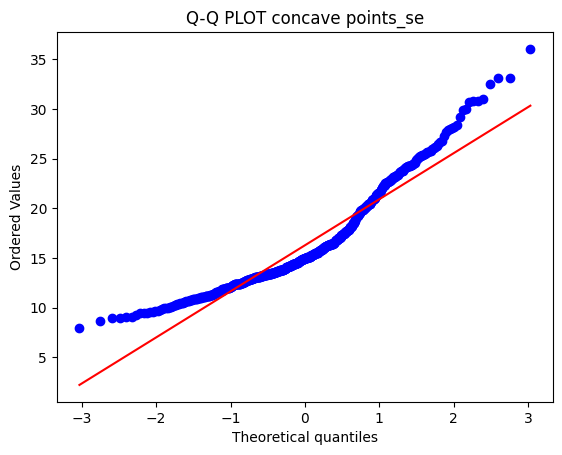

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['radius_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'radius_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['radius_worst'] > 27.32]
outliers['radius_worst']
outliers['radius_worst'].value_counts().sum()

np.int64(17)

**texture_worst**
Distribuição aparentemente normal, 0 valores nulos

5 outliers para o limite superior, uma variabilidade muito baixa para a dispersão dos dados.

In [ ]:
dados_cancer['texture_worst'].value_counts().sort_values()

texture_worst
27.37    1
32.29    1
37.17    1
24.75    1
29.09    1
        ..
32.82    2
23.17    2
30.36    2
17.70    3
27.26    3
Name: count, Length: 511, dtype: int64

In [ ]:
#valores nulos
dados_cancer['texture_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='texture_worst', ylabel='Count'>

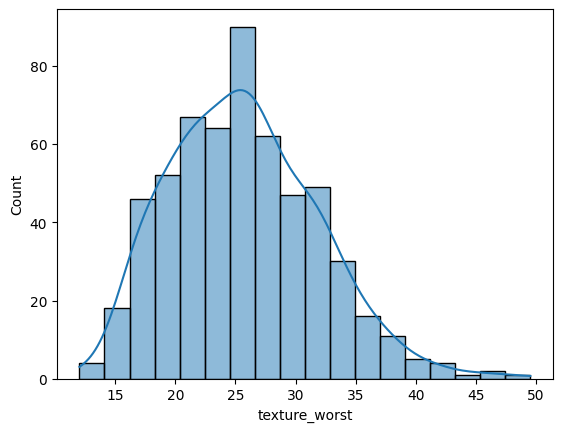

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'texture_worst', kde = True, stat = 'count')

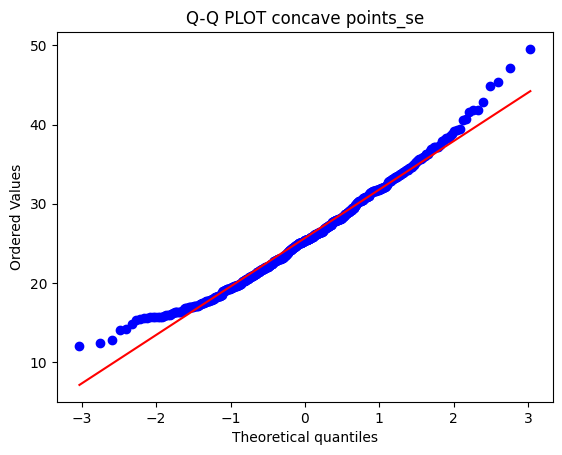

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['texture_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'texture_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['texture_worst'] > 41.85]
outliers['texture_worst']
outliers['texture_worst'].value_counts().sum()

np.int64(5)

**perimeter_worst**

Distribuição aproximadamente normal, 0 valores nulos

15 outliers para o limite superior, uma variabilidade muito baixo na dispersão dos registros

In [ ]:
#frequencia
dados_cancer['perimeter_worst'].value_counts().sort_values()

perimeter_worst
71.98     1
89.02     1
79.62     1
121.20    1
229.30    1
         ..
129.30    2
115.90    2
101.70    3
117.70    3
105.90    3
Name: count, Length: 514, dtype: int64

In [ ]:
#valores nulos
dados_cancer['perimeter_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='perimeter_worst', ylabel='Count'>

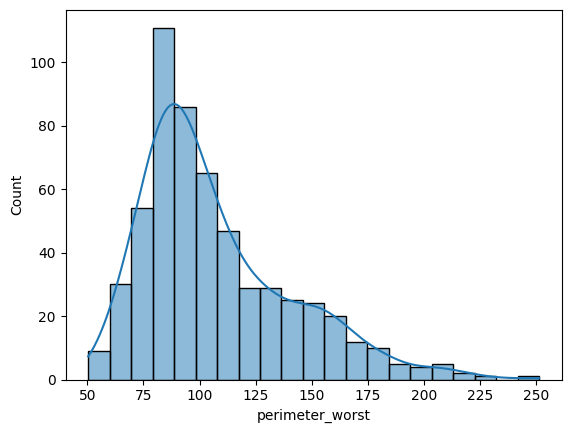

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'perimeter_worst', kde = True, stat = 'count')

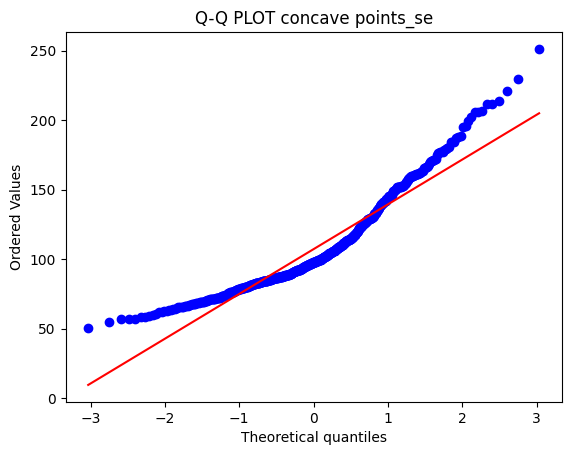

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['perimeter_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'perimeter_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['perimeter_worst'] > 186.8]
outliers['perimeter_worst']
outliers['perimeter_worst'].value_counts().sum()

np.int64(15)

**area_worst**

Distribuição aproximadamente não normal, 0 valores nulos, uma calda grande a direita

34 outliers para o limite superior, uma variabilidade na dispersão dos registros e no valor

In [ ]:
#frequencia
dados_cancer['area_worst'].value_counts().sort_values()

area_worst
1575.0    1
711.2     1
2398.0    1
1315.0    1
1866.0    1
         ..
1210.0    2
749.9     2
708.8     2
547.4     2
826.4     2
Name: count, Length: 544, dtype: int64

In [ ]:
#valores nulos
dados_cancer['area_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='area_worst', ylabel='Count'>

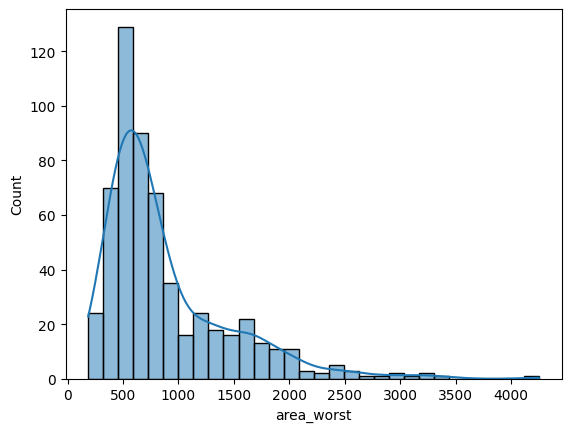

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'area_worst', kde = True, stat = 'count')

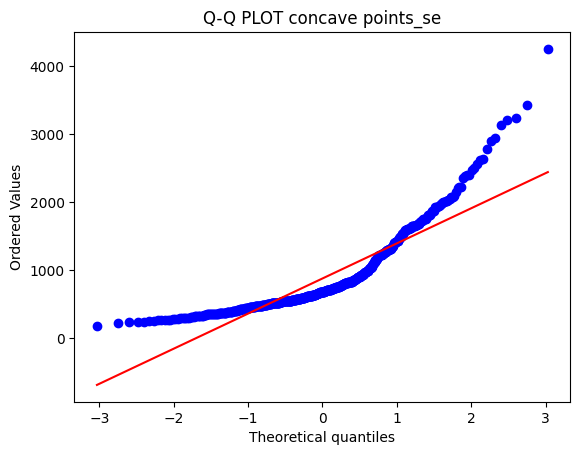

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['area_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'area_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['area_worst'] > 1938]
outliers['area_worst']
outliers['area_worst'].value_counts().sum()

np.int64(34)

**smoothness_worst**

Distribuição aparentemente normal, os dados estão muito proximo da reta no Q-Q PLOT, 0 valores nulos

6 outliers, 5 para o limite superior e 1 para o limite inferior, a variabilidade dos dados está muito baixo, tanto para a dispersão quanto para os valores dos registro.

In [ ]:
#frequencia
dados_cancer['smoothness_worst'].value_counts().sort_values()

smoothness_worst
0.08996    1
0.16500    1
0.14100    1
0.12460    1
0.14920    1
          ..
0.12560    4
0.14150    4
0.12160    4
0.12340    4
0.14010    4
Name: count, Length: 411, dtype: int64

In [ ]:
#valores nulos
dados_cancer['smoothness_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='smoothness_worst', ylabel='Count'>

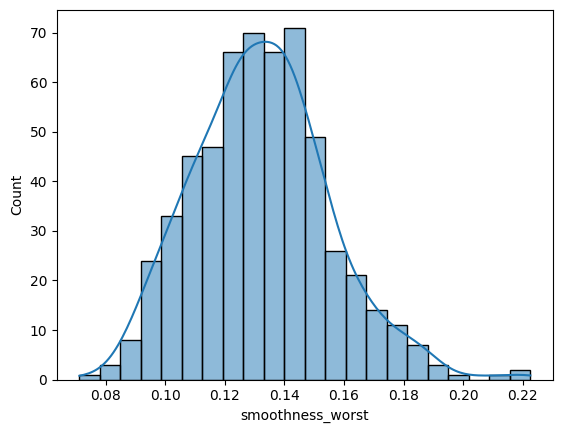

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'smoothness_worst', kde = True, stat = 'count')

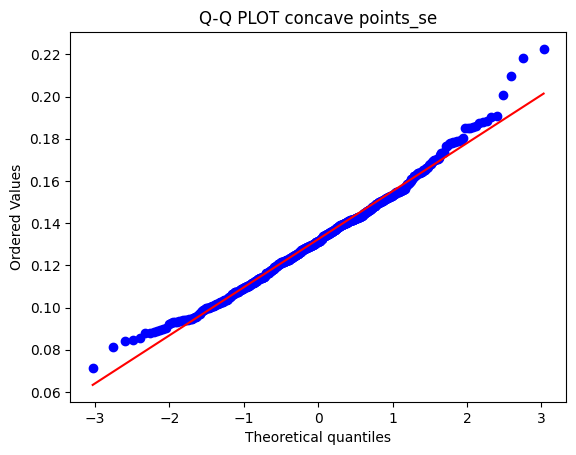

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['smoothness_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'smoothness_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['smoothness_worst'] > 0.1883]
outliers['smoothness_worst']
outliers['smoothness_worst'].value_counts().sum()

np.int64(6)

**compactness_worst**

Distribuição aparentemente não segue uma normalidade, 0 valores nulos

16 outliers para o limite superior, uma variabilidade pequena no valor dos registros. Uma calda grande a direita.

In [ ]:
#frequencia
dados_cancer['compactness_worst'].value_counts().sort_values()

compactness_worst
0.2883    1
0.6997    1
0.2196    1
0.1765    1
0.2250    1
         ..
0.1710    2
0.3089    2
0.1582    2
0.3416    3
0.1486    3
Name: count, Length: 529, dtype: int64

In [ ]:
#valores nulos
dados_cancer['compactness_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='compactness_worst', ylabel='Count'>

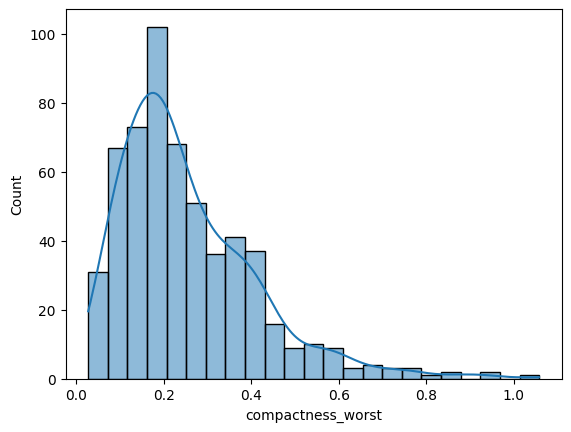

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'compactness_worst', kde = True, stat = 'count')

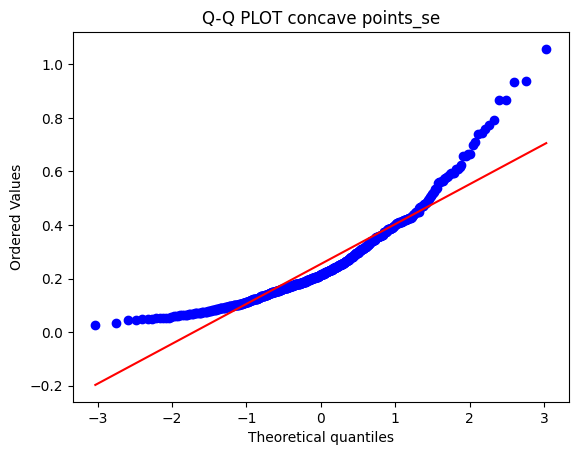

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['compactness_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'compactness_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['compactness_worst'] > 0.6247]
outliers['compactness_worst']
outliers['compactness_worst'].value_counts().sum()

np.int64(16)

**concavity_worst**

Distribuição aparenta normalidade, 0 valores nulos

42 outliers para o limite superior, uma calda grade a direita, uma pequena variabilidade nos valores do registros e dispersão do dados em relação a reta.



In [ ]:
#frequencia
dados_cancer['concavity_worst'].value_counts().sort_values()

concavity_worst
0.4000     1
0.1890     1
0.2390     1
0.5372     1
1.2520     1
          ..
0.1811     2
0.3965     2
0.4504     3
0.1377     3
0.0000    13
Name: count, Length: 539, dtype: int64

In [ ]:
#valores nulos
dados_cancer['concavity_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='concavity_worst', ylabel='Count'>

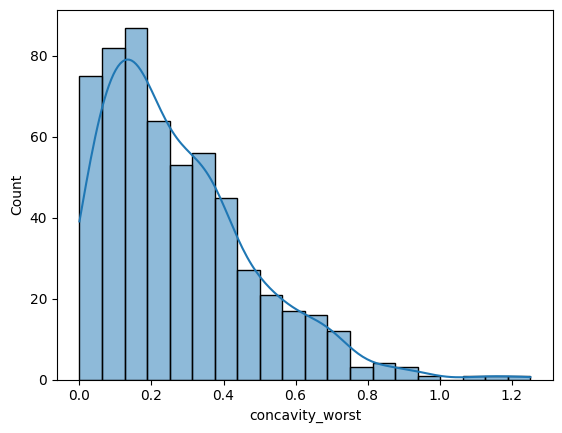

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concavity_worst', kde = True, stat = 'count')

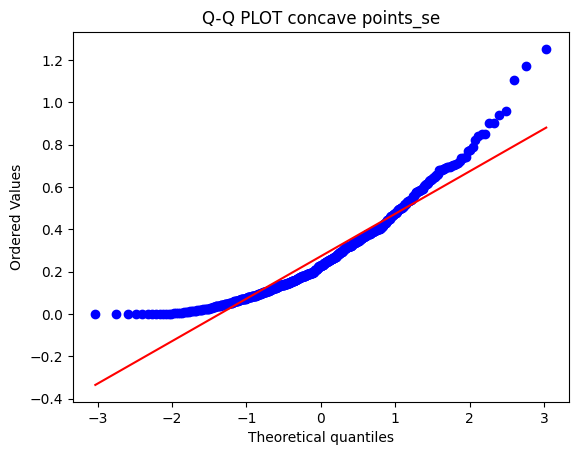

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['concavity_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_se')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'compactness_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['concavity_worst'] > 0.6247]
outliers['concavity_worst']
outliers['concavity_worst'].value_counts().sum()

np.int64(42)

**concave points_worst**
Absoluta certeza que segue uma distribuição normal, contendo 0 valores nulos

0 outliers, uma variabilidade nos dados no registros e dispersão quase nula.

In [ ]:
#frequencia
dados_cancer['concave points_worst'].value_counts().sort_values()

concave points_worst
0.10500     1
0.05000     1
0.06918     1
0.10950     1
0.07958     1
           ..
0.05556     3
0.06296     3
0.18270     3
0.04306     3
0.00000    13
Name: count, Length: 492, dtype: int64

In [ ]:
#valores nulos
dados_cancer['concave points_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='concave points_worst', ylabel='Count'>

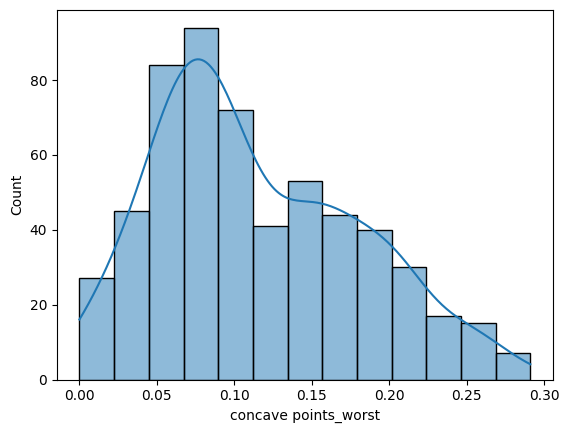

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'concave points_worst', kde = True, stat = 'count')

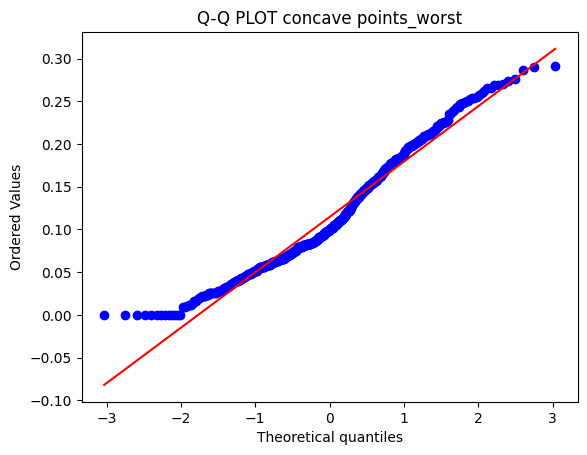

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['concave points_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT concave points_worst')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'concave points_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['concave points_worst'] > 0.291]
outliers['concave points_worst']
outliers['concave points_worst'].value_counts().sum()

np.int64(0)

**symmetry_worst**

Distribuição aparentemente normal, 0 valores nulos

23 Outliers para o limite superior, uma variabilidade baixa na dispersão dos dados, calda à direita.

In [ ]:
#frequencia
dados_cancer['symmetry_worst'].value_counts().sort_values()

symmetry_worst
0.2812    1
0.4824    1
0.3218    1
0.3271    1
0.2609    1
         ..
0.2383    3
0.2226    3
0.3196    3
0.2972    3
0.2369    3
Name: count, Length: 500, dtype: int64

In [ ]:
#valores nulos
dados_cancer['symmetry_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='symmetry_worst', ylabel='Count'>

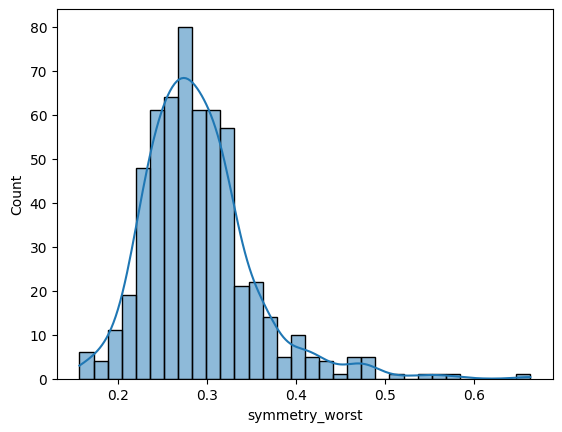

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'symmetry_worst', kde = True, stat = 'count')

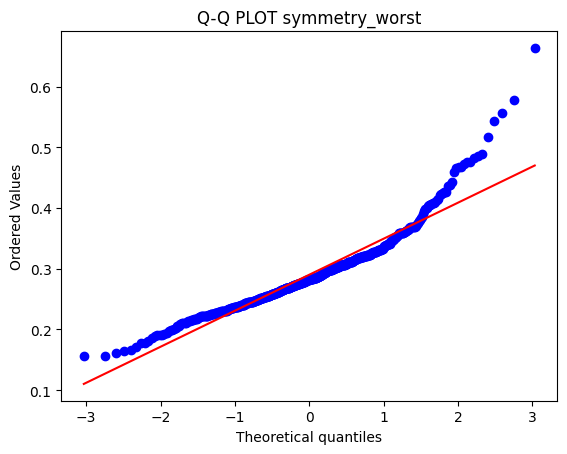

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['symmetry_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT symmetry_worst')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'symmetry_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['symmetry_worst'] > 0.4154]
outliers['symmetry_worst']
outliers['symmetry_worst'].value_counts().sum()

np.int64(23)

**fractal_dimension_worst**

Distribuição aparentemente normal, 0 valores nulos

24 outliers para o limite superior, uma variabilidade baixa na dispersão dos registros, calda a direita.

In [ ]:
#frequencia
dados_cancer['fractal_dimension_worst'].value_counts().sort_values()

fractal_dimension_worst
0.07259    1
0.09876    1
0.07421    1
0.12750    1
0.09564    1
          ..
0.07809    2
0.10230    2
0.10480    2
0.07863    2
0.07427    3
Name: count, Length: 535, dtype: int64

In [ ]:
#valores nulos
dados_cancer['fractal_dimension_worst'].isnull().sum()

np.int64(0)

<Axes: xlabel='fractal_dimension_worst', ylabel='Count'>

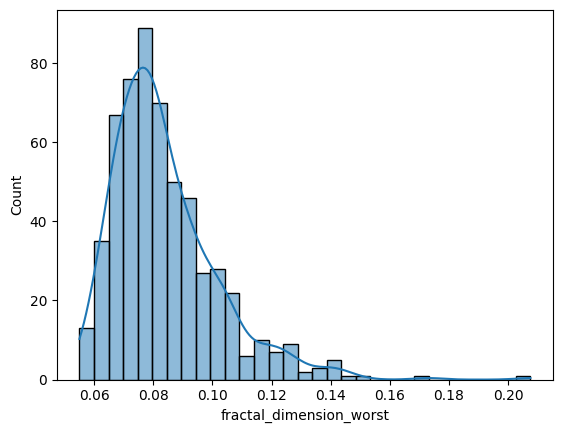

In [ ]:
#histograma com curva normal
sns.histplot(dados_cancer, x = 'fractal_dimension_worst', kde = True, stat = 'count')

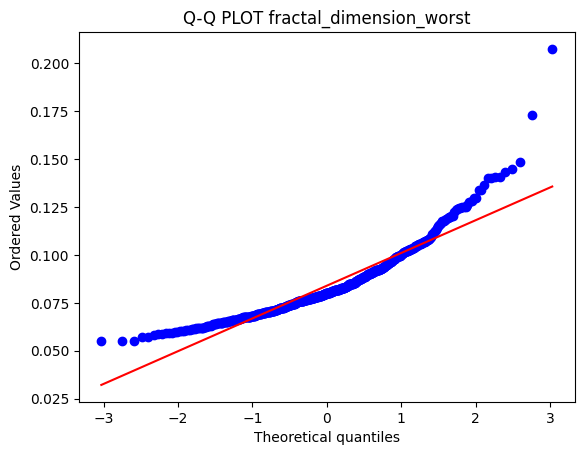

In [ ]:
#QQ PLOT
sts.probplot(dados_cancer['fractal_dimension_worst'], dist = 'norm', plot = plt)
plt.title('Q-Q PLOT fractal_dimension_worst')
plt.show()

In [ ]:
#box plot par aos outliers
px.box(dados_cancer, y = 'fractal_dimension_worst')

In [ ]:
#outliers
outliers = dados_cancer[dados_cancer['fractal_dimension_worst'] > 0.1224]
outliers['fractal_dimension_worst']
outliers['fractal_dimension_worst'].value_counts().sum()

np.int64(24)

#**TRATAMENTO DAS VARIAVEIS**

**Tratamento de valores missing em registros ou colunas**

In [ ]:
#variaveis e seus valores nulos.
dados_cancer.isnull().sum()


id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed: 32                569
dtype: int64

**Coluna: 'Unnamed: 32', era a unica que possuia algum valor nulo e não estava na matriz original dos dados, resumindo, não servia para nada.**

In [ ]:
#excluindo valores nulos
dados_cancer.drop(['Unnamed: 32'],axis = 1, inplace = True)
display(dados_cancer.head())
dados_cancer.shape

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  radius_worst  texture_worst  perimeter_worst  area_worst  \
0  ...         25.38          17.33           184.60      2019.0   
1  ...         24.99          23.41           158.80      1956.0   
2  ...         23.57          25.53           152.50      1709.0   
3  ...         14.91          26.50            98.87       567.7   
4  ...         22.54          16.67           152.20      1575.0   

   smoothness_worst  compactness_worst  concavity_worst  concave points_worst  \
0            0.1622             0.6656           0.7119                0.2654   
1            0.1238             0.1866           0.2416                0.1860   
2            0.1444             0.4245           0.4504                0.2430   
3            0.2098             0.8663           0.6869                0.2575   
4            0.1374             0.2050           0.4000                0.1625   

   symmetry_worst  fractal_dimension_worst  
0          0.4601                  0.11890  
1          0.2750                  0.08902  
2          0.3613                  0.08758  
3          0.6638                  0.17300  
4          0.2364                  0.07678  

[5 rows x 32 columns]

(569, 32)

**Coluna: 'id', está sendo excluida por não servir para previsão, somente é utilizada para identificação no banco de dados do sistema.**

In [ ]:
#excluindo coluna ID
dados_cancer.drop(['id'], axis = 1, inplace= True)
display(dados_cancer.head())
dados_cancer.shape

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

(569, 31)

**Analise Descritiva do dataset**

In [ ]:
#estatistica das variaveis
dados_cancer.describe()

radius_mean  texture_mean  perimeter_mean    area_mean  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%           0.086370          0.064920        0.029560             0.020310   
50%           0.095870          0.092630        0.061540             0.033500   
75%           0.105300          0.130400        0.130700             0.074000   
max           0.163400          0.345400        0.426800             0.201200   

       symmetry_mean  fractal_dimension_mean  ...  radius_worst  \
count     569.000000              569.000000  ...    569.000000   
mean        0.181162                0.062798  ...     16.269190   
std         0.027414                0.007060  ...      4.833242   
min         0.106000                0.049960  ...      7.930000   
25%         0.161900                0.057700  ...     13.010000   
50%         0.179200                0.061540  ...     14.970000   
75%         0.195700                0.066120  ...     18.790000   
max         0.304000                0.097440  ...     36.040000   

       texture_worst  perimeter_worst   area_worst  smoothness_worst  \
count     569.000000       569.000000   569.000000        569.000000   
mean       25.677223       107.261213   880.583128          0.132369   
std         6.146258        33.602542   569.356993          0.022832   
min        12.020000        50.410000   185.200000          0.071170   
25%        21.080000        84.110000   515.300000          0.116600   
50%        25.410000        97.660000   686.500000          0.131300   
75%        29.720000       125.400000  1084.000000          0.146000   
max        49.540000       251.200000  4254.000000          0.222600   

       compactness_worst  concavity_worst  concave points_worst  \
count         569.000000       569.000000            569.000000   
mean            0.254265         0.272188              0.114606   
std             0.157336         0.208624              0.065732   
min             0.027290         0.000000              0.000000   
25%             0.147200         0.114500              0.064930   
50%             0.211900         0.226700              0.099930   
75%             0.339100         0.382900              0.161400   
max             1.058000         1.252000              0.291000   

       symmetry_worst  fractal_dimension_worst  
count      569.000000               569.000000  
mean         0.290076                 0.083946  
std          0.061867                 0.018061  
min          0.156500                 0.055040  
25%          0.250400                 0.071460  
50%          0.282200                 0.080040  
75%          0.317900                 0.092080  
max          0.663800                 0.207500  

[8 rows x 30 columns]

In [ ]:
#salvando dataframe pós analisado e tratado
dados_cancer.to_csv('dados_cancer_tratado.csv', sep = ',', encoding = 'iso-8859-1', index = False)

**PRÉ PROCESSAMENTO DOS DADOS**

Substituição das variaveis categoricas

diagnosis: 0 = M (maligno), 1 = (benigno)

Separação previsores e alvo, treino e teste

**Legenda das variaveis**

**ALVO:**
diagnosis: M = 0, B = 1

**PREVISORES:**
todas as 30 variaveis.





#**SEPARANDO TREINO E TESTE (EVITAR VAZAMENTO DOS DADOS)**



In [ ]:
#importação das bibliotecas necessárias para realizar as operações de treino e teste, estatisticas do modelo, e o pré processamento
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV #separa treino e teste e a validação cruzada
from sklearn.pipeline import Pipeline #criar o pipeline
from sklearn.compose import ColumnTransformer #transformador de colunas
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, minmax_scale, StandardScaler, LabelEncoder #pre processamento
from sklearn.impute import SimpleImputer #
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score #estatistica do modelo, acurácia do modelo e a matriz de confusão
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis # Redução de dimensionalidade (LDA)
from sklearn.naive_bayes import GaussianNB # NAIVE BAYES
from sklearn.svm import SVC # Maquina de vetor de suporte
from sklearn.linear_model import LogisticRegression # regressão logistica
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.tree import DecisionTreeClassifier # Arvore de decisão
from sklearn.ensemble import RandomForestClassifier # Random Forest
from xgboost import XGBClassifier # xgboost
from lightgbm import LGBMClassifier # lightgbm
from catboost import CatBoostClassifier # Catboost
#!pip install xgboost
#!pip install lightgbm
#!pip install catboost
from sklearn.neural_network import MLPClassifier #algoritmo de rede neural artificial

import joblib
import warnings #avisos

In [ ]:
#ignorando avisos
warnings.filterwarnings('ignore')

In [ ]:
from logging import warning
#Importando a base de dados analisada e tratada
dados_cancer_tratado = pd.read_csv('../data/processed/dados_cancer_tratado.csv', sep = ',', encoding = 'iso-8859-1')
display(dados_cancer_tratado.head())

diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0         M        17.99         10.38          122.80     1001.0   
1         M        20.57         17.77          132.90     1326.0   
2         M        19.69         21.25          130.00     1203.0   
3         M        11.42         20.38           77.58      386.1   
4         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0         0.2419  ...         25.38          17.33           184.60   
1         0.1812  ...         24.99          23.41           158.80   
2         0.2069  ...         23.57          25.53           152.50   
3         0.2597  ...         14.91          26.50            98.87   
4         0.1809  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 31 columns]

In [ ]:
#previsores
treino = dados_cancer_tratado.drop(['diagnosis'], axis = 1)
display(treino.head())
treino.shape

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
0           0.27760          0.3001              0.14710         0.2419   
1           0.07864          0.0869              0.07017         0.1812   
2           0.15990          0.1974              0.12790         0.2069   
3           0.28390          0.2414              0.10520         0.2597   
4           0.13280          0.1980              0.10430         0.1809   

   fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
0                 0.07871  ...         25.38          17.33           184.60   
1                 0.05667  ...         24.99          23.41           158.80   
2                 0.05999  ...         23.57          25.53           152.50   
3                 0.09744  ...         14.91          26.50            98.87   
4                 0.05883  ...         22.54          16.67           152.20   

   area_worst  smoothness_worst  compactness_worst  concavity_worst  \
0      2019.0            0.1622             0.6656           0.7119   
1      1956.0            0.1238             0.1866           0.2416   
2      1709.0            0.1444             0.4245           0.4504   
3       567.7            0.2098             0.8663           0.6869   
4      1575.0            0.1374             0.2050           0.4000   

   concave points_worst  symmetry_worst  fractal_dimension_worst  
0                0.2654          0.4601                  0.11890  
1                0.1860          0.2750                  0.08902  
2                0.2430          0.3613                  0.08758  
3                0.2575          0.6638                  0.17300  
4                0.1625          0.2364                  0.07678  

[5 rows x 30 columns]

(569, 30)

In [ ]:
#alvo
teste = dados_cancer['diagnosis']
#transformando as classes em binario
labell_encoder = LabelEncoder() #Encoder
teste_encodgin = labell_encoder.fit_transform(teste) #transformando
print(teste_encodgin) #exibição do array
labell_encoder.classes_ #descobrindo o valor da transformação de cada classe

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 1 0 0 0 0 1 0 1 1
 0 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 0 0 1 1 1 0 1 1 0 0 0 1 1 0 1 0 1 1 0 1 1 0 0 1 0 0 1 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 1 1 0 1
 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 0 1 1 1 0 1 0 1 0 0 1 0 1 1 1 1 0 0 1 1 0 0
 0 1 0 0 0 0 0 1 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 1 1 1 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 1 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 1 0 1 0 0 1 

array(['B', 'M'], dtype=object)

In [ ]:
#treinando os dados
x_train, x_test, y_train, y_test = train_test_split(treino, teste_encodgin, test_size= 0.3, random_state= 3)

In [ ]:
#separando ordinais e nominais
ordinais = ['diagnosis']
nominais = [coluna for coluna in treino.columns if coluna not in ordinais]

In [ ]:
#somente escalonado - transformador pelo label encoder
previsores_esc = ColumnTransformer([
    ('nom', Pipeline([
        ('scaler', StandardScaler()) #padronizando os registros numericos
    ]), nominais)
])

**RESUMO DO PRÉ-PROCESSAMENTO**

previsores: conjunto das variaveis previsoras, com as variaveis qualitativas nominais transformanda em ordinais pelo LabelEncoder

previsores_esc: conjunto das variaveis previsoras ja transformanda (LabelEncoder) e escalonada

**kfold = (n_splits = 30, shuffle = True, random_state = 5)**


#**NAIVE BAYES**


In [ ]:
#criando os pipeline
pipeline_previsores = Pipeline([
    ('clt', GaussianNB())
])

pipeline_previsores_esc = Pipeline([
    ('pre', previsores_esc),
    ('clt', GaussianNB())
])


**Previsores (somente LabelEncoding)**

In [ ]:
#treinamento e teste
print('\n Avaliação em dados de teste previsores')
pipeline_previsores.fit(x_train, y_train)
previsores_xteste = pipeline_previsores.predict(x_test)
print('Acurácia do teste previsores: {:.2%}'.format(accuracy_score(y_test, previsores_xteste)))
confusion_matrix(y_test, previsores_xteste)


 Avaliação em dados de teste previsores
Acurácia do teste previsores: 94.74%


array([[106,   3],
       [  6,  56]])

In [ ]:
#estatistica geral do modelo
print(classification_report(y_test, previsores_xteste))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       109
           1       0.95      0.90      0.93        62

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
#treinamento e teste do treino
print('\n Avaliação da acurácia do treino')
previsores_xtreino = pipeline_previsores.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino)))
confusion_matrix(y_train, previsores_xtreino)


 Avaliação da acurácia do treino
Acurácia do treino: 93.72%


array([[243,   5],
       [ 20, 130]])

In [ ]:
#estatistica geral do modelo de treino
print(classification_report(y_train, previsores_xtreino))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95       248
           1       0.96      0.87      0.91       150

    accuracy                           0.94       398
   macro avg       0.94      0.92      0.93       398
weighted avg       0.94      0.94      0.94       398



In [ ]:
#validação cruzada
kfold = KFold(n_splits = 30, shuffle = True, random_state = 5)
modelo = GaussianNB()
resultado = cross_val_score(modelo, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação: {:.2%}'.format(resultado.mean()))

Acurácia da validação: 93.82%


**Previsores_esc**

In [ ]:
#acurácia do teste
print('\n Avaliação em dados de teste previsores_esc')
pipeline_previsores_esc.fit(x_train, y_train)
previsores_esc_xteste = pipeline_previsores_esc.predict(x_test)
print('Acurácia do teste previsores_esc: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste)))
confusion_matrix(y_test, previsores_esc_xteste)


 Avaliação em dados de teste previsores_esc
Acurácia do teste previsores_esc: 94.15%


array([[104,   5],
       [  5,  57]])

In [ ]:
#estatistica geral
print(classification_report(y_test, previsores_esc_xteste))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       109
           1       0.92      0.92      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
#acurácia no treino
print('\n Avaliação da acurácia do treino')
previsores_esc_xtreino = pipeline_previsores_esc.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino)))
confusion_matrix(y_train, previsores_esc_xtreino)



 Avaliação da acurácia do treino
Acurácia do treino: 93.72%


array([[240,   8],
       [ 17, 133]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc, treino, teste_encodgin, cv = 30)
print('acurácia: {:.2%}'.format(resultado.mean()))

acurácia: 93.32%


#**MAQUINA DE VETOR DE SUPORTE (SVM)**

In [ ]:
#criando o modelo
svm = SVC(random_state= 0)

In [ ]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(kernel = ['rbf', 'linear', 'poly','sigmoid'],random_state = [1,2,3,4], C = [1,2,3,4])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['kernel'] * len(parametros_grid['random_state'] * len(parametros_grid['C'])))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_svm = GridSearchCV(svm, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 64


In [ ]:
grid_svm.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=SVC(random_state=0),
             param_grid={'C': [1, 2, 3, 4],
                         'kernel': ['rbf', 'linear', 'poly', 'sigmoid'],
                         'random_state': [1, 2, 3, 4]},
             scoring='roc_auc')

In [ ]:
#melhor hiperparametro
grid_svm.best_params_

{'C': 3, 'kernel': 'linear', 'random_state': 1}

In [ ]:
#todos os resultados das combinações
resultado_grid_svm = pd.DataFrame(grid_svm.cv_results_)
resultado_grid_svm.sort_values('rank_test_score', ascending= True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
36       1.804084      1.236160         0.003367        0.000257        3   
37       2.042622      1.593503         0.004026        0.000682        3   
38       2.008872      1.150379         0.003729        0.000518        3   
39       1.808726      1.237267         0.003220        0.000161        3   
7        1.163565      0.497020         0.004525        0.001131        1   
..            ...           ...              ...             ...      ...   
44       0.005303      0.000088         0.003564        0.000070        3   
60       0.005320      0.000157         0.003562        0.000226        4   
61       0.006934      0.001623         0.004743        0.001161        4   
62       0.006213      0.000679         0.004031        0.000438        4   
63       0.005819      0.000214         0.003988        0.000486        4   

   param_kernel  param_random_state  \
36       linear                   1   
37       linear                   2   
38       linear                   3   
39       linear                   4   
7        linear                   4   
..          ...                 ...   
44      sigmoid                   1   
60      sigmoid                   1   
61      sigmoid                   2   
62      sigmoid                   3   
63      sigmoid                   4   

                                              params  split0_test_score  \
36   {'C': 3, 'kernel': 'linear', 'random_state': 1}           0.997453   
37   {'C': 3, 'kernel': 'linear', 'random_state': 2}           0.997453   
38   {'C': 3, 'kernel': 'linear', 'random_state': 3}           0.997453   
39   {'C': 3, 'kernel': 'linear', 'random_state': 4}           0.997453   
7    {'C': 1, 'kernel': 'linear', 'random_state': 4}           0.997878   
..                                               ...                ...   
44  {'C': 3, 'kernel': 'sigmoid', 'random_state': 1}           0.178268   
60  {'C': 4, 'kernel': 'sigmoid', 'random_state': 1}           0.178268   
61  {'C': 4, 'kernel': 'sigmoid', 'random_state': 2}           0.178268   
62  {'C': 4, 'kernel': 'sigmoid', 'random_state': 3}           0.178268   
63  {'C': 4, 'kernel': 'sigmoid', 'random_state': 4}           0.178268   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
36           0.992360           0.977768           0.991282         0.989716   
37           0.992360           0.977768           0.991282         0.989716   
38           0.992360           0.977768           0.991282         0.989716   
39           0.992360           0.977768           0.991282         0.989716   
7            0.994907           0.974281           0.991282         0.989587   
..                ...                ...                ...              ...   
44           0.238964           0.316478           0.197036         0.232687   
60           0.235993           0.311683           0.196600         0.230636   
61           0.235993           0.311683           0.196600         0.230636   
62           0.235993           0.311683           0.196600         0.230636   
63           0.235993           0.311683           0.196600         0.230636   

    std_test_score  rank_test_score  
36        0.007281                1  
37        0.007281                1  
38        0.007281                1  
39        0.007281                1  
7         0.009140                5  
..             ...              ...  
44        0.053134               57  
60        0.051230               61  
61        0.051230               61  
62        0.051230               61  
63        0.051230               61  

[64 rows x 15 columns]

In [ ]:
#pipeline sem escalonamento
pipeline_previsores_svm = Pipeline([
    ('clt', SVC(kernel= 'linear', random_state= 1, C = 3))
])
pipeline_previsores_esc_svm = Pipeline([
    ('pre', previsores_esc),
    ('clt', SVC(kernel = 'linear', random_state= 1, C = 3))
])

In [ ]:
#teste
print('\n Previsores(sem escalonar) SVM - Teste')
pipeline_previsores_svm.fit(x_train, y_train)
previsores_xteste_svm = pipeline_previsores_svm.predict(x_test)
print('Acurácia previsores(sem escalonar) SVM: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_svm)))
confusion_matrix(y_test, previsores_xteste_svm)


 Previsores(sem escalonar) SVM - Teste
Acurácia previsores(sem escalonar) SVM: 94.74%


array([[105,   4],
       [  5,  57]])

In [ ]:
#treino
print('\n Previsores(sem escalonar) SVM - Treino')
pipeline_previsores_svm.fit(x_train, y_train)
previsores_xtreino_svm = pipeline_previsores_svm.predict(x_train)
print('Acurácia previsores(sem escalonar) SVM: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_svm)))
confusion_matrix(y_train, previsores_xtreino_svm)


 Previsores(sem escalonar) SVM - Treino
Acurácia previsores(sem escalonar) SVM: 96.48%


array([[244,   4],
       [ 10, 140]])

In [ ]:
#validação cruzada
kfold = KFold(n_splits= 30, shuffle = True, random_state = 5)
modelo = SVC(kernel = 'linear', random_state= 1 , C = 3)
resultado_svm = cross_val_score(modelo, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado_svm.mean()))

Acurácia validação cruzada: 95.41%


**previsores_esc**

In [ ]:
#teste
print('\n Previsores_esc(escalonado) SVM - Teste')
pipeline_previsores_esc_svm.fit(x_train, y_train)
previsores_esc_xteste_svm = pipeline_previsores_esc_svm.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_svm)))
confusion_matrix(y_test, previsores_esc_xteste_svm)


 Previsores_esc(escalonado) SVM - Teste
Acurácia do teste: 98.25%


array([[108,   1],
       [  2,  60]])

In [ ]:
#treino
print('\n Previsores(escalonado) SVM - Treino')
previsores_esc_xtreino_svm = pipeline_previsores_esc_svm.predict(x_train)
print('Acurácia previsores(escalonado) SVM: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_svm)))
confusion_matrix(y_train, previsores_esc_xtreino_svm)


 Previsores(escalonado) SVM - Treino
Acurácia previsores(escalonado) SVM: 98.74%


array([[245,   3],
       [  2, 148]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_svm, treino, teste_encodgin, cv = 30)
print('acurácia da validação cruzada: {:.2%}'.format(resultado.mean()))

acurácia da validação cruzada: 97.54%


#**Regressão Logística**

In [ ]:
#rg
rg = LogisticRegression(random_state = 0)

In [ ]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(solver = ['lbfgs', 'liblinear', 'sag', 'saga'],tol = [0.0001,0.0002,0.0003],
                       random_state = [1,2,3], C = [1,2,3,4], penalty = ['None','l2'], max_iter = [300,400,500,600,700])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['solver']) * len(parametros_grid['random_state']) * len(parametros_grid['C']) * len(parametros_grid['penalty']) * len(parametros_grid['max_iter']) * len(parametros_grid['tol'])))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_rg = GridSearchCV(rg, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 1440


In [ ]:

grid_rg.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=LogisticRegression(random_state=0),
             param_grid={'C': [1, 2, 3, 4],
                         'max_iter': [300, 400, 500, 600, 700],
                         'penalty': ['None', 'l2'], 'random_state': [1, 2, 3],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga'],
                         'tol': [0.0001, 0.0002, 0.0003]},
             scoring='roc_auc')

In [ ]:
#treino
grid_rg.best_params_

{'C': 3,
 'max_iter': 300,
 'penalty': 'l2',
 'random_state': 1,
 'solver': 'lbfgs',
 'tol': 0.0001}

In [ ]:
#ranking dos melhores parametros
resultado_grid_rg = pd.DataFrame(grid_rg.cv_results_)
resultado_grid_rg.sort_values('rank_test_score', ascending= True)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  param_C  \
780       0.270576      0.260819         0.006281        0.002459        3   
781       0.057904      0.028147         0.003585        0.000199        3   
782       0.039249      0.000760         0.003451        0.000042        3   
756       0.150972      0.103963         0.004750        0.001772        3   
758       0.157995      0.045448         0.004936        0.001912        3   
..             ...           ...              ...             ...      ...   
525       0.000347      0.000010         0.000000        0.000000        2   
526       0.000333      0.000009         0.000000        0.000000        2   
527       0.000326      0.000008         0.000000        0.000000        2   
16        0.000486      0.000030         0.000000        0.000000        1   
15        0.000608      0.000133         0.000000        0.000000        1   

     param_max_iter param_penalty  param_random_state param_solver  param_tol  \
780             300            l2                   3        lbfgs     0.0001   
781             300            l2                   3        lbfgs     0.0002   
782             300            l2                   3        lbfgs     0.0003   
756             300            l2                   1        lbfgs     0.0001   
758             300            l2                   1        lbfgs     0.0003   
..              ...           ...                 ...          ...        ...   
525             500          None                   2         saga     0.0001   
526             500          None                   2         saga     0.0002   
527             500          None                   2         saga     0.0003   
16              300          None                   2    liblinear     0.0002   
15              300          None                   2    liblinear     0.0001   

                                                params  split0_test_score  \
780  {'C': 3, 'max_iter': 300, 'penalty': 'l2', 'ra...           0.998727   
781  {'C': 3, 'max_iter': 300, 'penalty': 'l2', 'ra...           0.998727   
782  {'C': 3, 'max_iter': 300, 'penalty': 'l2', 'ra...           0.998727   
756  {'C': 3, 'max_iter': 300, 'penalty': 'l2', 'ra...           0.998727   
758  {'C': 3, 'max_iter': 300, 'penalty': 'l2', 'ra...           0.998727   
..                                                 ...                ...   
525  {'C': 2, 'max_iter': 500, 'penalty': 'None', '...                NaN   
526  {'C': 2, 'max_iter': 500, 'penalty': 'None', '...                NaN   
527  {'C': 2, 'max_iter': 500, 'penalty': 'None', '...                NaN   
16   {'C': 1, 'max_iter': 300, 'penalty': 'None', '...                NaN   
15   {'C': 1, 'max_iter': 300, 'penalty': 'None', '...                NaN   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
780            0.99618           0.984743           0.993897         0.993387   
781            0.99618           0.984743           0.993897         0.993387   
782            0.99618           0.984743           0.993897         0.993387   
756            0.99618           0.984743           0.993897         0.993387   
758            0.99618           0.984743           0.993897         0.993387   
..                 ...                ...                ...              ...   
525                NaN                NaN                NaN              NaN   
526                NaN                NaN                NaN              NaN   
527                NaN                NaN                NaN              NaN   
16                 NaN                NaN                NaN              NaN   
15                 NaN                NaN                NaN              NaN   

     std_test_score  rank_test_score  
780        0.005275                1  
781        0.005275                1  
782        0.005275                1  
756        0.005275                1  
75

In [ ]:
#pipelines
pipeline_previsores_rg = Pipeline([
    ('clt',LogisticRegression(C =  3, max_iter =  300, penalty = 'l2', random_state = 1,solver =  'lbfgs', tol = 0.0001))
])
pipeline_previsores_esc_rg = Pipeline([
    ('pre', previsores_esc),
    ('clt', LogisticRegression(C =  3, max_iter =  300, penalty = 'l2', random_state = 1,solver =  'lbfgs', tol = 0.0001))
])

In [ ]:
#treinamento e teste
print('\n Avaliação em dados de teste previsores (rg)')
pipeline_previsores_rg.fit(x_train, y_train)
previsores_xteste_rg = pipeline_previsores_rg.predict(x_test)
print('Acurácia do teste previsores (rg): {:.2%}'.format(accuracy_score(y_test, previsores_xteste_rg)))
confusion_matrix(y_test, previsores_xteste_rg)



 Avaliação em dados de teste previsores (rg)
Acurácia do teste previsores (rg): 94.74%


array([[105,   4],
       [  5,  57]])

In [ ]:
#estatisca geral do teste
print(classification_report(y_test, previsores_xteste_rg))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       109
           1       0.93      0.92      0.93        62

    accuracy                           0.95       171
   macro avg       0.94      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171



In [ ]:
#treino
print('\n Avaliação em dados de treino previsores (rg)')
previsores_xtreino_rg = pipeline_previsores_rg.predict(x_train)
print('Acurácia do teste previsores (rg): {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_rg)))
confusion_matrix(y_train, previsores_xtreino_rg)


 Avaliação em dados de treino previsores (rg)
Acurácia do teste previsores (rg): 95.73%


array([[241,   7],
       [ 10, 140]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_rg, treino, teste_encodgin, cv = 30)
print('Acurácia da validação cruzada: {:.2%}'.format(resultado.mean()))


Acurácia da validação cruzada: 95.43%


**previsores_esc**

In [ ]:
#test
print('\n Avaliação em dados de treino previsores_esc (rg)')
pipeline_previsores_esc_rg.fit(x_train, y_train)
previsores_esc_xteste_rg = pipeline_previsores_esc_rg.predict(x_test)
print('Acurácia teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_rg)))
confusion_matrix(y_test, previsores_esc_xteste_rg)


 Avaliação em dados de treino previsores_esc (rg)
Acurácia teste: 97.66%


array([[108,   1],
       [  3,  59]])

In [ ]:
#treino
print('\n Avaliação em dados de treino previsores_esc (rg)')
previsores_esc_xtreino_rg = pipeline_previsores_esc_rg.predict(x_train)
print('acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_rg)))
confusion_matrix(y_train, previsores_esc_xtreino_rg)


 Avaliação em dados de treino previsores_esc (rg)
acurácia do treino: 98.74%


array([[246,   2],
       [  3, 147]])

In [ ]:
#validação cruzada previsores_esc
resultado = cross_val_score(pipeline_previsores_esc_rg, treino, teste_encodgin, cv = 30)
print('acurácia da validação cruzada: {:.2%}'.format(resultado.mean()))

acurácia da validação cruzada: 97.72%


#**KNN**


In [ ]:
knn = KNeighborsClassifier()

In [ ]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(n_neighbors = [8,9,10,12,13,14], metric = ['euclidean','manhattan','minkowski'], p = [1,2,3] )
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['n_neighbors']) * len(parametros_grid['metric']) * len(parametros_grid['p'])))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_KNN = GridSearchCV(knn, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 54


In [ ]:
#treinando o grid com os dados de treino
grid_KNN.fit(x_train,y_train)

GridSearchCV(cv=4, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [8, 9, 10, 12, 13, 14],
                         'p': [1, 2, 3]},
             scoring='roc_auc')

In [ ]:
#melhor parametro
print(grid_KNN.best_estimator_)

KNeighborsClassifier(n_neighbors=9, p=3)


In [ ]:
#ranking dos melhores parametros
resultado_grid_knn = pd.DataFrame(grid_KNN.cv_results_)
resultado_grid_knn.sort_values('rank_test_score', ascending= True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_metric  \
41       0.001855      0.000302         0.017266        0.000100    minkowski   
30       0.001524      0.000051         0.003536        0.000085    manhattan   
32       0.001672      0.000033         0.003713        0.000082    manhattan   
31       0.001612      0.000057         0.003610        0.000100    manhattan   
48       0.001521      0.000176         0.003443        0.000107    minkowski   
44       0.002131      0.000087         0.019516        0.003404    minkowski   
27       0.001635      0.000188         0.004400        0.001256    manhattan   
29       0.001575      0.000052         0.003654        0.000142    manhattan   
28       0.002289      0.000539         0.004020        0.000266    manhattan   
45       0.001624      0.000240         0.003537        0.000132    minkowski   
34       0.001643      0.000060         0.003717        0.000143    manhattan   
35       0.001850      0.000196         0.004296        0.000627    manhattan   
33       0.001692      0.000073         0.003664        0.000047    manhattan   
51       0.001997      0.000182         0.004775        0.000581    minkowski   
38       0.001968      0.000185         0.017293        0.000235    minkowski   
10       0.002919      0.000263         0.005106        0.000060    euclidean   
9        0.003064      0.000159         0.005331        0.000236    euclidean   
46       0.001534      0.000099         0.002928        0.000052    minkowski   
11       0.002819      0.000227         0.005287        0.000291    euclidean   
13       0.002131      0.000192         0.004012        0.000160    euclidean   
49       0.001423      0.000041         0.003330        0.000699    minkowski   
14       0.001612      0.000024         0.003120        0.000053    euclidean   
12       0.002715      0.000227         0.005060        0.000274    euclidean   
40       0.001996      0.000709         0.003208        0.000306    minkowski   
5        0.003380      0.001148         0.006016        0.000851    euclidean   
4        0.002569      0.000581         0.005545        0.001005    euclidean   
3        0.002714      0.000267         0.004854        0.000135    euclidean   
50       0.002262      0.000217         0.018159        0.000812    minkowski   
47       0.001804      0.000281         0.017490        0.000318    minkowski   
17       0.001570      0.000070         0.003088        0.000062    euclidean   
16       0.001638      0.000091         0.003131        0.000089    euclidean   
15       0.001532      0.000140         0.002981        0.000164    euclidean   
52       0.001741      0.000257         0.003188        0.000119    minkowski   
53       0.001902      0.000250         0.019515        0.002207    minkowski   
6        0.003628      0.001061         0.005409        0.000954    euclidean   
43       0.001587      0.000185         0.003139        0.000510    minkowski   
8        0.002960      0.000118         0.005215        0.000132    euclidean   
7        0.003147      0.000628         0.005364        0.000670    euclidean   
39       0.001912      0.000382         0.003935        0.000662    minkowski   
21       0.001622      0.000105         0.003554        0.000092    manhattan   
23       0.001574      0.000030         0.003423        0.000074    manhattan   
22       0.001699      0.000083         0.003793        0.000448    manhattan   
24       0.001616      0.000045         0.003563        0.000050    manhattan   
42       0.001707      0.000179         0.003555        0.000100    minkowski   
26       0.001488      0.000068         0.003420        0.000082    manhattan   
25       0.001791      0.000436         0.003748        0.000375    manhattan   
2        0.003020      0.000296         0.006135        0.000903    euclidean   
1        0.002852      0.000322         0.005505        0.000619    euclidean   
37       0.001519      0.000032    

In [ ]:
#pipeline KNN
pipeline_previsores_knn = Pipeline([
    ('clt', KNeighborsClassifier(n_neighbors = 9,metric = 'minkowski', p = 3))
])
pipeline_previsores_esc_knn = Pipeline([
    ('pre', previsores_esc),
    ('clt', KNeighborsClassifier(n_neighbors = 9,metric = 'minkowski', p = 3))
])

In [ ]:
#teste
print('\nAvaliando teste')
pipeline_previsores_knn.fit(x_train, y_train)
previsores_xteste_knn = pipeline_previsores_knn.predict(x_test)
print('Acurácia do treino: {:.2%}: '.format(accuracy_score(y_test, previsores_xteste_knn)))
confusion_matrix(y_test, previsores_xteste_knn)


Avaliando teste
Acurácia do treino: 94.15%: 


array([[105,   4],
       [  6,  56]])

In [ ]:
#estatistica geral do teste
print(classification_report(y_test, previsores_xteste_knn))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       109
           1       0.93      0.90      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
#treino
print('\n Avaliando treino')
previsores_xtreino_knn = pipeline_previsores_knn.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_knn)))
confusion_matrix(y_train, previsores_xtreino_knn)


 Avaliando treino
Acurácia do treino: 93.47%


array([[239,   9],
       [ 17, 133]])

In [ ]:
#validação cruzada
kfold = KFold(n_splits = 30,shuffle = True,random_state= 5 )
resultado = cross_val_score(pipeline_previsores_knn, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação cruzada: {:.2%}'.format(resultado.mean()))

Acurácia da validação cruzada: 92.96%


**previsores_esc**

In [ ]:
#teste
print('Avaliação do teste')
pipeline_previsores_esc_knn.fit(x_train, y_train)
previsores_esc_xteste_knn = pipeline_previsores_esc_knn.predict(x_test)
print('acurácia teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_knn)))
confusion_matrix(y_test, previsores_esc_xteste_knn)

Avaliação do teste
acurácia teste: 96.49%


array([[108,   1],
       [  5,  57]])

In [ ]:
#estatistica geral do teste
print(classification_report(y_test, previsores_esc_xteste_knn))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97       109
           1       0.98      0.92      0.95        62

    accuracy                           0.96       171
   macro avg       0.97      0.96      0.96       171
weighted avg       0.97      0.96      0.96       171



In [ ]:
#treino
print('Avaliação do treino')
previsores_esc_xtreino_knn = pipeline_previsores_esc_knn.predict(x_train)
print('acurácia treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_knn)))
confusion_matrix(y_train, previsores_esc_xtreino_knn)


Avaliação do treino
acurácia treino: 96.73%


array([[246,   2],
       [ 11, 139]])

In [ ]:
#validação cruzada
resultado_knn = cross_val_score(pipeline_previsores_esc_knn, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado_knn.mean()))

Acurácia validação cruzada: 96.29%


#**ARVORE DE DECISÃO**

In [ ]:
arvore = DecisionTreeClassifier()

In [ ]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(criterion= ['gini','entropy','log loss'], random_state= [5,9,4,39,12], max_depth= [2,3,4,5,6])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['criterion']) * len(parametros_grid['random_state']) * len(parametros_grid['max_depth'])))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_arvore = GridSearchCV(arvore, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 75


In [ ]:
grid_arvore.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log loss'],
                         'max_depth': [2, 3, 4, 5, 6],
                         'random_state': [5, 9, 4, 39, 12]},
             scoring='roc_auc')

In [ ]:
grid_arvore.best_params_

{'criterion': 'entropy', 'max_depth': 3, 'random_state': 9}

In [ ]:
#ranking dos melhores parametros
resultado_grid_arvore = pd.DataFrame(grid_arvore.cv_results_)
resultado_grid_arvore.sort_values('rank_test_score', ascending= True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
31       0.005366      0.000282         0.002581        0.000094   
32       0.005327      0.000247         0.002572        0.000119   
33       0.005485      0.000169         0.002688        0.000098   
30       0.005259      0.000146         0.002497        0.000148   
34       0.005332      0.000072         0.002579        0.000088   
..            ...           ...              ...             ...   
70       0.000336      0.000035         0.000000        0.000000   
71       0.000311      0.000007         0.000000        0.000000   
72       0.000440      0.000074         0.000000        0.000000   
73       0.000395      0.000052         0.000000        0.000000   
74       0.000346      0.000016         0.000000        0.000000   

   param_criterion  param_max_depth  param_random_state  \
31         entropy                3                   9   
32         entropy                3                   4   
33         entropy                3                  39   
30         entropy                3                   5   
34         entropy                3                  12   
..             ...              ...                 ...   
70        log loss                6                   5   
71        log loss                6                   9   
72        log loss                6                   4   
73        log loss                6                  39   
74        log loss                6                  12   

                                               params  split0_test_score  \
31  {'criterion': 'entropy', 'max_depth': 3, 'rand...           0.983447   
32  {'criterion': 'entropy', 'max_depth': 3, 'rand...           0.983447   
33  {'criterion': 'entropy', 'max_depth': 3, 'rand...           0.983447   
30  {'criterion': 'entropy', 'max_depth': 3, 'rand...           0.983447   
34  {'criterion': 'entropy', 'max_depth': 3, 'rand...           0.983447   
..                                                ...                ...   
70  {'criterion': 'log loss', 'max_depth': 6, 'ran...                NaN   
71  {'criterion': 'log loss', 'max_depth': 6, 'ran...                NaN   
72  {'criterion': 'log loss', 'max_depth': 6, 'ran...                NaN   
73  {'criterion': 'log loss', 'max_depth': 6, 'ran...                NaN   
74  {'criterion': 'log loss', 'max_depth': 6, 'ran...                NaN   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
31           0.929754           0.919355           0.953357         0.946478   
32           0.929754           0.905405           0.953357         0.942991   
33           0.929754           0.919355           0.936138         0.942173   
30           0.929754           0.919355           0.936138         0.942173   
34           0.929754           0.919355           0.936138         0.942173   
..                ...                ...                ...              ...   
70                NaN                NaN                NaN              NaN   
71                NaN                NaN                NaN              NaN   
72                NaN                NaN                NaN              NaN   
73                NaN                NaN                NaN              NaN   
74                NaN                NaN                NaN              NaN   

    std_test_score  rank_test_score  
31        0.024644                1  
32        0.028862                2  
33        0.024570                3  
30        0.024570                3  
34        0.024570                3  
..             ...              ...  
70             NaN               51  
71             NaN               51  
72             NaN               51  
73             NaN               51  
74             NaN               51  

[75 rows x 15 columns]

In [ ]:
#criação dos pipeline
pipeline_previsores_arvore = Pipeline([
    ('clt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state= 9))
])
pipeline_previsores_esc_arvore = Pipeline([
    ('pre', previsores_esc),
    ('clt', DecisionTreeClassifier(criterion = 'entropy', max_depth = 3, random_state= 9))
])

In [ ]:
#teste
print('Avaliação teste ')
pipeline_previsores_arvore.fit(x_train, y_train)
previsores_xteste_arvore = pipeline_previsores_arvore.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_arvore)))
confusion_matrix(y_test, previsores_xteste_arvore)

Avaliação teste 
Acurácia do teste: 94.15%


array([[105,   4],
       [  6,  56]])

In [ ]:
#estatistica geral do modelo
print(classification_report(y_test, previsores_xteste_arvore))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       109
           1       0.93      0.90      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
#treino
print('Avaliação treino')
previsores_xtreino_arvore = pipeline_previsores_arvore.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_arvore)))
confusion_matrix(y_train, previsores_xtreino_arvore)

Avaliação treino
Acurácia do treino: 98.24%


array([[242,   6],
       [  1, 149]])

In [ ]:
#validação cruzada
resultado_arvore = cross_val_score(pipeline_previsores_arvore, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação cruzada: {:.2%}'.format(resultado_arvore.mean()))

Acurácia da validação cruzada: 94.03%


**previsores_esc**

In [ ]:
#teste
print('Avaliação previsores_esc')
pipeline_previsores_esc_arvore.fit(x_train, y_train)
previsores_esc_xteste_arvore = pipeline_previsores_esc_arvore.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xteste_arvore)))
confusion_matrix(y_test, previsores_esc_xteste_arvore)

Avaliação previsores_esc
Acurácia do teste: 94.15%


array([[105,   4],
       [  6,  56]])

In [ ]:
print(classification_report(y_test, previsores_esc_xteste_arvore))

              precision    recall  f1-score   support

           0       0.95      0.96      0.95       109
           1       0.93      0.90      0.92        62

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.94       171
weighted avg       0.94      0.94      0.94       171



In [ ]:
#treino
print('Avaliação previsores_esc')
previsores_esc_xtreino_arvore = pipeline_previsores_esc_arvore.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_arvore)))
confusion_matrix(y_train, previsores_esc_xtreino_arvore)

Avaliação previsores_esc
Acurácia do treino: 98.24%


array([[242,   6],
       [  1, 149]])

In [ ]:
#validação cruzada
resultado_arvore = cross_val_score(pipeline_previsores_esc_arvore, treino, teste_encodgin, cv = kfold)
print('Acurácia da validação cruzada: {:.2%}'.format(resultado_arvore.mean()))

Acurácia da validação cruzada: 94.03%


#**Random Forest**

In [ ]:
rf = RandomForestClassifier()

In [ ]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(criterion = ['entropy', 'gini', 'log_loss'],random_state = [1,2,3,5], n_estimators = [100,200,500,700], max_depth = [1,2,4,5])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['criterion'] * len(parametros_grid['random_state'] * len(parametros_grid['n_estimators'] * len(parametros_grid['max_depth']))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_rf = GridSearchCV(rf, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 192


In [ ]:
grid_rf.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['entropy', 'gini', 'log_loss'],
                         'max_depth': [1, 2, 4, 5],
                         'n_estimators': [100, 200, 500, 700],
                         'random_state': [1, 2, 3, 5]},
             scoring='roc_auc')

In [ ]:
grid_rf.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'n_estimators': 100,
 'random_state': 5}

In [ ]:
#todos os resultados das combinações
resultado_grid_rf = pd.DataFrame(grid_rf.cv_results_)
resultado_grid_rf.sort_values('rank_test_score', ascending= True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
51        0.148456      0.004147         0.009141        0.000649   
179       0.246292      0.013373         0.013591        0.002882   
178       0.203509      0.029213         0.011674        0.002566   
50        0.144339      0.006331         0.007956        0.000351   
48        0.144310      0.003987         0.008572        0.001025   
..             ...           ...              ...             ...   
114       0.312254      0.098371         0.013021        0.002343   
64        0.119080      0.004775         0.007718        0.000235   
68        0.225231      0.006512         0.013440        0.000907   
0         0.120578      0.004150         0.008087        0.000313   
128       0.122906      0.007526         0.009034        0.001172   

    param_criterion  param_max_depth  param_n_estimators  param_random_state  \
51          entropy                5                 100                   5   
179        log_loss                5                 100                   5   
178        log_loss                5                 100                   3   
50          entropy                5                 100                   3   
48          entropy                5                 100                   1   
..              ...              ...                 ...                 ...   
114            gini                5                 100                   3   
64             gini                1                 100                   1   
68             gini                1                 200                   1   
0           entropy                1                 100                   1   
128        log_loss                1                 100                   1   

                                                params  split0_test_score  \
51   {'criterion': 'entropy', 'max_depth': 5, 'n_es...           1.000000   
179  {'criterion': 'log_loss', 'max_depth': 5, 'n_e...           1.000000   
178  {'criterion': 'log_loss', 'max_depth': 5, 'n_e...           1.000000   
50   {'criterion': 'entropy', 'max_depth': 5, 'n_es...           1.000000   
48   {'criterion': 'entropy', 'max_depth': 5, 'n_es...           1.000000   
..                                                 ...                ...   
114  {'criterion': 'gini', 'max_depth': 5, 'n_estim...           1.000000   
64   {'criterion': 'gini', 'max_depth': 1, 'n_estim...           0.996180   
68   {'criterion': 'gini', 'max_depth': 1, 'n_estim...           0.997029   
0    {'criterion': 'entropy', 'max_depth': 1, 'n_es...           0.996604   
128  {'criterion': 'log_loss', 'max_depth': 1, 'n_e...           0.996604   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
51            0.996604           0.977768           0.997820         0.993048   
179           0.996604           0.977768           0.997820         0.993048   
178           0.997878           0.974281           0.998692         0.992713   
50            0.997878           0.974281           0.998692         0.992713   
48            0.996604           0.975588           0.998256         0.992612   
..                 ...                ...                ...              ...   
114           0.995756           0.942023           0.998692         0.984118   
64            0.995331           0.962511           0.978640         0.983165   
68            0.993633           0.960985           0.979948         0.982899   
0             0.996180           0.960113           0.978640         0.982884   
128           0.996180           0.960113           0.978640         0.982884   

     std_test_score  rank_test_score  
51         0.008905                1  
179        0.008905                1  
178        0.010669                3  
50         0.010669                3  
48         0.009902                5  
..              ...              ...  
114        0.024352              188  
64   

In [ ]:
#pipelines
pipeline_previsores_rf = Pipeline([
    ('clt',RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 5, max_depth = 5))
])
pipeline_previsores_esc_rf = Pipeline([
    ('pre', previsores_esc),
    ('clt',RandomForestClassifier(criterion = 'entropy', n_estimators = 100, random_state = 5, max_depth = 5))
])

In [ ]:
#teste
print('Avaliação do teste')
pipeline_previsores_rf.fit(x_train, y_train)
previsores_xteste_rf = pipeline_previsores_rf.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_rf)))
confusion_matrix(y_test,previsores_xteste_rf)

Avaliação do teste
Acurácia do teste: 95.32%


array([[106,   3],
       [  5,  57]])

In [ ]:
#treino
print('Avaliação do treino')
previsores_xtreino_rf = pipeline_previsores_rf.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_rf)))
confusion_matrix(y_train,previsores_xtreino_rf )

Avaliação do treino
Acurácia do treino: 99.50%


array([[248,   0],
       [  2, 148]])

In [ ]:
#validação cruzada
resultado_rf = cross_val_score(pipeline_previsores_rf, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

Acurácia validação cruzada: 92.96%


**previsoes_esc**

In [ ]:
#teste
print('Avaliação do teste')
pipeline_previsores_esc_rf.fit(x_train, y_train)
previsores_esc_xteste_rf = pipeline_previsores_esc_rf.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_rf)))
confusion_matrix(y_test,previsores_esc_xteste_rf)

Avaliação do teste
Acurácia do teste: 95.32%


array([[106,   3],
       [  5,  57]])

In [ ]:
#treino
print('Avaliação do treino')
previsores_esc_xtreino_rf = pipeline_previsores_rf.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_rf)))
confusion_matrix(y_train,previsores_esc_xtreino_rf )

Avaliação do treino
Acurácia do treino: 99.50%


array([[248,   0],
       [  2, 148]])

In [ ]:
#validação cruzada
resultado_rf = cross_val_score(pipeline_previsores_esc_rf, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

Acurácia validação cruzada: 92.96%


#**XGboost**

In [ ]:
xgboost = XGBClassifier()

In [ ]:
#criando os parametros que serão aplicados no grid
parametros_grid = dict(objective = ['binary:logistic'],random_state = [1,2,3,5], n_estimators = [100,200,500], max_depth = [1,2,4,5], learning_rate = [0.02,0.05,0.03,0.08])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['objective'] * len(parametros_grid['random_state'] * len(parametros_grid['n_estimators'] * len(parametros_grid['max_depth'] *  len(parametros_grid['learning_rate'])))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_xg = GridSearchCV(xgboost, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 192


In [ ]:
grid_xg.fit(x_train, y_train)

GridSearchCV(cv=4,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=Non...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None, ...),
             param_grid={'learning_rate': [0.02, 0.05, 0.03, 0.08],
                         'max_depth': [1, 2, 4, 5],
                         'n_estimators': [100, 200, 500],
                         'objective': ['binary:logistic'],
                         'random_state': [1, 2, 3, 5]},
             scoring='roc_auc')

In [ ]:
grid_xg.best_params_

{'learning_rate': 0.08,
 'max_depth': 1,
 'n_estimators': 500,
 'objective': 'binary:logistic',
 'random_state': 1}

In [ ]:
#todos os resultados das combinações
resultado_grid_xg = pd.DataFrame(grid_xg.cv_results_)
resultado_grid_xg.sort_values('rank_test_score', ascending= True)


mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
155       0.331241      0.251871         0.017841        0.019126   
154       0.227872      0.110220         0.008508        0.003459   
153       0.390919      0.125931         0.013037        0.006449   
152       0.159030      0.074329         0.007021        0.001503   
59        0.177580      0.099614         0.006242        0.000205   
..             ...           ...              ...             ...   
3         0.037223      0.002564         0.006992        0.001121   
12        0.060852      0.003412         0.006765        0.000483   
13        0.058917      0.001275         0.006281        0.000439   
14        0.062705      0.004236         0.007202        0.000411   
15        0.068670      0.017794         0.006872        0.000372   

     param_learning_rate  param_max_depth  param_n_estimators  \
155                 0.08                1                 500   
154                 0.08                1                 500   
153                 0.08                1                 500   
152                 0.08                1                 500   
59                  0.05                1                 500   
..                   ...              ...                 ...   
3                   0.02                1                 100   
12                  0.02                2                 100   
13                  0.02                2                 100   
14                  0.02                2                 100   
15                  0.02                2                 100   

     param_objective  param_random_state  \
155  binary:logistic                   5   
154  binary:logistic                   3   
153  binary:logistic                   2   
152  binary:logistic                   1   
59   binary:logistic                   5   
..               ...                 ...   
3    binary:logistic                   5   
12   binary:logistic                   1   
13   binary:logistic                   2   
14   binary:logistic                   3   
15   binary:logistic                   5   

                                                params  split0_test_score  \
155  {'learning_rate': 0.08, 'max_depth': 1, 'n_est...           0.999151   
154  {'learning_rate': 0.08, 'max_depth': 1, 'n_est...           0.999151   
153  {'learning_rate': 0.08, 'max_depth': 1, 'n_est...           0.999151   
152  {'learning_rate': 0.08, 'max_depth': 1, 'n_est...           0.999151   
59   {'learning_rate': 0.05, 'max_depth': 1, 'n_est...           0.999151   
..                                                 ...                ...   
3    {'learning_rate': 0.02, 'max_depth': 1, 'n_est...           0.996817   
12   {'learning_rate': 0.02, 'max_depth': 2, 'n_est...           0.999576   
13   {'learning_rate': 0.02, 'max_depth': 2, 'n_est...           0.999576   
14   {'learning_rate': 0.02, 'max_depth': 2, 'n_est...           0.999576   
15   {'learning_rate': 0.02, 'max_depth': 2, 'n_est...           0.999576   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
155           0.989389           0.980820           1.000000         0.992340   
154           0.989389           0.980820           1.000000         0.992340   
153           0.989389           0.980820           1.000000         0.992340   
152           0.989389           0.980820           1.000000         0.992340   
59            0.991087           0.979076           1.000000         0.992328   
..                 ...                ...                ...              ...   
3             0.991935           0.954228           0.981473         0.981113   
12            0.985357           0.951613           0.987794         0.981085   
13            0.985357           0.951613           0.987794         0.981085   
14            0.985357           0.951613           0.987794         0.981085   
15            0.985357           0.951613         

In [ ]:
#pipelines
pipeline_previsores_xg = Pipeline([
    ('clt',XGBClassifier(objective = 'binary:logistic',learning_rate = 0.08, n_estimators = 500, random_state = 1, max_depth = 1))
])
pipeline_previsores_esc_xg = Pipeline([
    ('pre', previsores_esc),
    ('clt',XGBClassifier(objective = 'binary:logistic',learning_rate = 0.08, n_estimators = 500, random_state = 1, max_depth = 1))
])


In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_xg.fit(x_train, y_train)
previsores_xteste_xg = pipeline_previsores_xg.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_xteste_xg)))
confusion_matrix(y_test, previsores_xteste_xg)


Avaliação teste
Acurácia do teste: 95.91%


array([[107,   2],
       [  5,  57]])

In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_xg.fit(x_train, y_train)
previsores_xtreino_xg = pipeline_previsores_xg.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_xg)))
confusion_matrix(y_train, previsores_xtreino_xg)

Avaliação treino
Acurácia do treino: 100.00%


array([[248,   0],
       [  0, 150]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_xg, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

Acurácia validação cruzada: 97.35%


**previsoes_esc**

In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_esc_xg.fit(x_train, y_train)
previsores_esc_xteste_xg = pipeline_previsores_esc_xg.predict(x_test)
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsores_esc_xteste_xg)))
confusion_matrix(y_test, previsores_esc_xteste_xg)


Avaliação teste
Acurácia do teste: 95.91%


array([[107,   2],
       [  5,  57]])

In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_esc_xg.fit(x_train, y_train)
previsores_esc_xtreino_xg = pipeline_previsores_esc_xg.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_xg)))
confusion_matrix(y_train, previsores_esc_xtreino_xg)

Avaliação treino
Acurácia do treino: 100.00%


array([[248,   0],
       [  0, 150]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_xg, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

Acurácia validação cruzada: 97.35%


#**Light GBM**

In [ ]:
#dados para treino
lgbm = LGBMClassifier()

In [ ]:
#hiperparametros
#criando os parametros que serão aplicados no grid
parametros_grid = dict(objective = ['binary'],num_leaves = [120,200,250,300],verbosity = [-1], max_depth = [1,2,3,5], learning_rate = [0.02,0.05,0.03,0.08],max_bin = [120,200,370,425],)
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['objective'] * len(parametros_grid['num_leaves'] * len(parametros_grid['verbosity'] * len(parametros_grid['max_depth'] *  len(parametros_grid['learning_rate'] * len(parametros_grid['max_bin']))))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
grid_lgbm = GridSearchCV(lgbm, parametros_grid, scoring= 'roc_auc', cv = 4)

Numero de combinações de hiperparametros: 256


In [ ]:
#grid
grid_lgbm.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=LGBMClassifier(),
             param_grid={'learning_rate': [0.02, 0.05, 0.03, 0.08],
                         'max_bin': [120, 200, 370, 425],
                         'max_depth': [1, 2, 3, 5],
                         'num_leaves': [120, 200, 250, 300],
                         'objective': ['binary'], 'verbosity': [-1]},
             scoring='roc_auc')

In [ ]:
#melhor parametros
grid_lgbm.best_params_

{'learning_rate': 0.08,
 'max_bin': 120,
 'max_depth': 2,
 'num_leaves': 120,
 'objective': 'binary',
 'verbosity': -1}

In [ ]:
#todos os resultados das combinações
resultado_grid_lgbm = pd.DataFrame(grid_lgbm.cv_results_)
resultado_grid_lgbm.sort_values('rank_test_score', ascending= True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
199       0.018595      0.000399         0.003583        0.000021   
198       0.017330      0.000937         0.003545        0.000273   
197       0.017759      0.001830         0.003316        0.000348   
196       0.016394      0.000372         0.003402        0.000171   
212       0.017353      0.000563         0.004020        0.000187   
..             ...           ...              ...             ...   
16        0.010849      0.000387         0.002891        0.000198   
0         0.031958      0.035961         0.003646        0.000503   
1         0.014079      0.001793         0.004088        0.000651   
2         0.014749      0.000530         0.004033        0.000167   
3         0.015731      0.000499         0.003989        0.000127   

     param_learning_rate  param_max_bin  param_max_depth  param_num_leaves  \
199                 0.08            120                2               300   
198                 0.08            120                2               250   
197                 0.08            120                2               200   
196                 0.08            120                2               120   
212                 0.08            200                2               120   
..                   ...            ...              ...               ...   
16                  0.02            200                1               120   
0                   0.02            120                1               120   
1                   0.02            120                1               200   
2                   0.02            120                1               250   
3                   0.02            120                1               300   

    param_objective  param_verbosity  \
199          binary               -1   
198          binary               -1   
197          binary               -1   
196          binary               -1   
212          binary               -1   
..              ...              ...   
16           binary               -1   
0            binary               -1   
1            binary               -1   
2            binary               -1   
3            binary               -1   

                                                params  split0_test_score  \
199  {'learning_rate': 0.08, 'max_bin': 120, 'max_d...           1.000000   
198  {'learning_rate': 0.08, 'max_bin': 120, 'max_d...           1.000000   
197  {'learning_rate': 0.08, 'max_bin': 120, 'max_d...           1.000000   
196  {'learning_rate': 0.08, 'max_bin': 120, 'max_d...           1.000000   
212  {'learning_rate': 0.08, 'max_bin': 200, 'max_d...           1.000000   
..                                                 ...                ...   
16   {'learning_rate': 0.02, 'max_bin': 200, 'max_d...           0.996817   
0    {'learning_rate': 0.02, 'max_bin': 120, 'max_d...           0.996817   
1    {'learning_rate': 0.02, 'max_bin': 120, 'max_d...           0.996817   
2    {'learning_rate': 0.02, 'max_bin': 120, 'max_d...           0.996817   
3    {'learning_rate': 0.02, 'max_bin': 120, 'max_d...           0.996817   

     split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
199           0.993209           0.978204           1.000000         0.992853   
198           0.993209           0.978204           1.000000         0.992853   
197           0.993209           0.978204           1.000000         0.992853   
196           0.993209           0.978204           1.000000         0.992853   
212           0.993209           0.978204           1.000000         0.992853   
..                 ...                ...                ...              ...   
16            0.991723           0.954664           0.980384         0.980897   
0             0.991723           0.954664           0.980384         0.980897   
1             0.991723           0.954664           0.980384         0.980897   
2             0.991723 

In [ ]:
#pipelines
pipeline_previsores_lgbm = Pipeline([
    ('clt',LGBMClassifier(objective = 'binary',learning_rate = 0.08, num_leaves = 120, max_depth = 2, verbosity = -1, max_bin = 120))
])
pipeline_previsores_esc_lgbm = Pipeline([
    ('pre', previsores_esc),
    ('clt',LGBMClassifier(objective = 'binary',learning_rate = 0.08, num_leaves = 120, max_depth = 2, verbosity = -1, max_bin = 120))
])


In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_lgbm.fit(x_train, y_train)
previsores_xteste_lgbm = pipeline_previsores_lgbm.predict(x_test)
print('Acurácia teste: {:.2%}'.format(accuracy_score(y_test,previsores_xteste_lgbm)))
confusion_matrix(y_test,previsores_xteste_lgbm)

Avaliação teste
Acurácia teste: 95.91%


array([[105,   4],
       [  3,  59]])

In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_lgbm.fit(x_train, y_train)
previsores_xtreino_lgbm = pipeline_previsores_lgbm.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_xtreino_lgbm)))
confusion_matrix(y_train, previsores_xtreino_lgbm)

Avaliação treino
Acurácia do treino: 100.00%


array([[248,   0],
       [  0, 150]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_lgbm, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

Acurácia validação cruzada: 96.29%


**previsores_esc**

In [ ]:
#teste
print('Avaliação teste')
pipeline_previsores_esc_lgbm.fit(x_train, y_train)
previsores_esc_xteste_lgbm = pipeline_previsores_esc_lgbm.predict(x_test)
print('Acurácia teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xteste_lgbm)))
confusion_matrix(y_test,previsores_esc_xteste_lgbm)

Avaliação teste
Acurácia teste: 95.91%


array([[105,   4],
       [  3,  59]])

In [ ]:
#treino
print('Avaliação treino')
pipeline_previsores_esc_lgbm.fit(x_train, y_train)
previsores_esc_xtreino_lgbm = pipeline_previsores_esc_lgbm.predict(x_train)
print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsores_esc_xtreino_lgbm)))
confusion_matrix(y_train, previsores_esc_xtreino_lgbm)

Avaliação treino
Acurácia do treino: 100.00%


array([[248,   0],
       [  0, 150]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_lgbm, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

Acurácia validação cruzada: 96.11%


#**Catboost**

In [ ]:
catb = CatBoostClassifier()

In [ ]:
#criando os hparametros que serão aplicados no grid
parametros_grid = dict(task_type = ['CPU'],iterations = [300,200],depth = [2,4,5], learning_rate = [0.02,0.05,0.08],eval_metric = ['Accuracy'], random_state = [6,9,2])
#exibindo a quantidade de combinações possiveos
print("Numero de combinações de hiperparametros: {}".format(len(parametros_grid['task_type'] * len(parametros_grid['iterations'] * len(parametros_grid['depth'] *  len(parametros_grid['learning_rate'] * len(parametros_grid['eval_metric'] * len(parametros_grid['random_state']))))))))
#criando o grid, com o modelo, os parametros, scoring e a quantidade de divisões para a validação cruzada
random_catb = RandomizedSearchCV(catb, parametros_grid, scoring= 'roc_auc', cv = 4, n_iter= 40, random_state= 40)

Numero de combinações de hiperparametros: 54


In [ ]:
#passando os dados para o treino do random
random_catb.fit(x_train, y_train)

A saída de streaming foi truncada nas últimas 5000 linhas.
0:	learn: 0.9060403	total: 1.55ms	remaining: 310ms
1:	learn: 0.9060403	total: 2.52ms	remaining: 249ms
2:	learn: 0.9161074	total: 3.63ms	remaining: 238ms
3:	learn: 0.9261745	total: 4.55ms	remaining: 223ms
4:	learn: 0.9295302	total: 5.5ms	remaining: 215ms
5:	learn: 0.9362416	total: 6.43ms	remaining: 208ms
6:	learn: 0.9429530	total: 7.39ms	remaining: 204ms
7:	learn: 0.9429530	total: 8.28ms	remaining: 199ms
8:	learn: 0.9496644	total: 9.15ms	remaining: 194ms
9:	learn: 0.9429530	total: 10ms	remaining: 191ms
10:	learn: 0.9496644	total: 10.9ms	remaining: 188ms
11:	learn: 0.9530201	total: 11.9ms	remaining: 186ms
12:	learn: 0.9563758	total: 12.8ms	remaining: 184ms
13:	learn: 0.9463087	total: 13.7ms	remaining: 182ms
14:	learn: 0.9563758	total: 14.6ms	remaining: 180ms
15:	learn: 0.9597315	total: 15.5ms	remaining: 178ms
16:	learn: 0.9597315	total: 16.4ms	remaining: 176ms
17:	learn: 0.9597315	total: 17.3ms	remaining: 175ms
18:	learn: 0.95973

RandomizedSearchCV(cv=4,
                   estimator=<catboost.core.CatBoostClassifier object at 0x7be5203a4d70>,
                   n_iter=40,
                   param_distributions={'depth': [2, 4, 5],
                                        'eval_metric': ['Accuracy'],
                                        'iterations': [300, 200],
                                        'learning_rate': [0.02, 0.05, 0.08],
                                        'random_state': [6, 9, 2],
                                        'task_type': ['CPU']},
                   random_state=40, scoring='roc_auc')

In [ ]:
#melhor combinação de hp
random_catb.best_params_

{'task_type': 'CPU',
 'random_state': 9,
 'learning_rate': 0.02,
 'iterations': 200,
 'eval_metric': 'Accuracy',
 'depth': 4}

In [ ]:
#ranking dos parametros
resultados_random_catb = pd.DataFrame(random_catb.cv_results_)
resultados_random_catb.sort_values('rank_test_score', ascending= True)

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
34       0.639555      0.184271         0.005686        0.000679   
30       1.426094      0.311986         0.004663        0.000780   
29       0.735052      0.021391         0.005855        0.001111   
22       1.025841      0.381456         0.004581        0.000503   
20       1.112318      0.024447         0.004234        0.000093   
27       1.015837      0.450941         0.004975        0.001372   
10       0.397769      0.055066         0.005433        0.000507   
38       0.351974      0.013168         0.004484        0.000147   
9        1.048428      0.363772         0.005328        0.000994   
5        0.954772      0.358375         0.006086        0.000891   
19       0.789706      0.250418         0.005563        0.001738   
7        0.363540      0.012974         0.004658        0.000157   
35       0.244669      0.013155         0.004177        0.000466   
18       0.750016      0.016896         0.004345        0.000193   
13       0.539015      0.222112         0.005407        0.001252   
26       0.258492      0.033381         0.006116        0.001175   
14       0.921848      0.320367         0.004581        0.000445   
37       0.490372      0.016683         0.004369        0.000252   
28       0.757997      0.019343         0.004468        0.000201   
0        1.151782      0.034971         0.004526        0.000290   
24       0.243787      0.001522         0.005248        0.001470   
25       1.163813      0.041081         0.004359        0.000252   
12       0.715379      0.007955         0.004179        0.000267   
32       0.733809      0.017712         0.004249        0.000294   
31       0.357159      0.015216         0.004545        0.000214   
6        1.221933      0.148583         0.004417        0.000147   
23       0.356949      0.007359         0.004179        0.000403   
2        0.795119      0.026565         0.004561        0.000240   
1        1.085614      0.370580         0.005110        0.000861   
33       1.322949      0.355054         0.004893        0.000559   
21       1.144698      0.005033         0.004682        0.000674   
4        0.262763      0.014342         0.004952        0.000662   
16       0.235437      0.012092         0.004235        0.000254   
36       0.231483      0.006129         0.003677        0.000083   
11       0.767427      0.021003         0.004416        0.000321   
39       1.430442      0.403477         0.004556        0.000400   
8        0.520095      0.013402         0.004568        0.000581   
3        0.741749      0.025519         0.004469        0.000140   
15       0.756470      0.041159         0.005511        0.001572   
17       0.494122      0.010270         0.004704        0.000868   

   param_task_type  param_random_state  param_learning_rate  param_iterations  \
34             CPU                   9                 0.02               200   
30             CPU                   6                 0.08               300   
29             CPU                   6                 0.02               200   
22             CPU                   6                 0.02               300   
20             CPU                   6                 0.02               300   
27             CPU                   2                 0.05               300   
10             CPU                   6                 0.02               300   
38             CPU                   2                 0.08               300   
9              CPU                   9                 0.05               200   
5              CPU                   2                 0.02               300   
19             CPU                   2                 0.02               200   
7              CPU                   9                 0.05               300   
35             CPU                   2                 0.05               200   
18             CPU                   6                 0.05               200   


In [ ]:
#pipeline dos algortimos
pipeline_previsores_catb = Pipeline([
    ('clt', CatBoostClassifier(task_type = 'CPU', random_state = 9, learning_rate = 0.02, iterations = 200, eval_metric = 'Accuracy', depth = 4))
])
pipeline_previsores_esc_catb = Pipeline([
    ('pre', previsores_esc),
    ('clt', CatBoostClassifier(task_type = 'CPU', random_state = 9, learning_rate = 0.02, iterations = 200, eval_metric = 'Accuracy', depth = 4))
])

In [ ]:
#test
print('Avaliação Teste')
pipeline_previsores_catb.fit(x_train, y_train)
previsores_xteste_catb = pipeline_previsores_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_xteste_catb)))
confusion_matrix(y_test, previsores_xteste_catb)

Avaliação Teste
0:	learn: 0.9522613	total: 2.61ms	remaining: 519ms
1:	learn: 0.9623116	total: 4.71ms	remaining: 467ms
2:	learn: 0.9623116	total: 6.76ms	remaining: 444ms
3:	learn: 0.9648241	total: 8.88ms	remaining: 435ms
4:	learn: 0.9623116	total: 11.8ms	remaining: 461ms
5:	learn: 0.9723618	total: 14ms	remaining: 454ms
6:	learn: 0.9673367	total: 17.1ms	remaining: 471ms
7:	learn: 0.9723618	total: 19.3ms	remaining: 463ms
8:	learn: 0.9673367	total: 21.3ms	remaining: 453ms
9:	learn: 0.9698492	total: 23.4ms	remaining: 445ms
10:	learn: 0.9698492	total: 25.4ms	remaining: 436ms
11:	learn: 0.9748744	total: 27.4ms	remaining: 430ms
12:	learn: 0.9723618	total: 30.9ms	remaining: 445ms
13:	learn: 0.9748744	total: 33.2ms	remaining: 441ms
14:	learn: 0.9748744	total: 35.3ms	remaining: 435ms
15:	learn: 0.9748744	total: 37.4ms	remaining: 430ms
16:	learn: 0.9748744	total: 39.5ms	remaining: 425ms
17:	learn: 0.9748744	total: 41.5ms	remaining: 420ms
18:	learn: 0.9748744	total: 43.6ms	remaining: 415ms
19:	lear

array([[105,   4],
       [  5,  57]])

In [ ]:
#treino
print('Avaliação Teste')
pipeline_previsores_catb.fit(x_train, y_train)
previsores_xtreino_catb = pipeline_previsores_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_xtreino_catb)))
confusion_matrix(y_test, previsores_xtreino_catb)

Avaliação Teste
0:	learn: 0.9522613	total: 4.03ms	remaining: 803ms
1:	learn: 0.9623116	total: 6.19ms	remaining: 613ms
2:	learn: 0.9623116	total: 8.21ms	remaining: 539ms
3:	learn: 0.9648241	total: 10.3ms	remaining: 503ms
4:	learn: 0.9623116	total: 12.3ms	remaining: 481ms
5:	learn: 0.9723618	total: 14.3ms	remaining: 464ms
6:	learn: 0.9673367	total: 16.4ms	remaining: 452ms
7:	learn: 0.9723618	total: 18.5ms	remaining: 443ms
8:	learn: 0.9673367	total: 20.6ms	remaining: 438ms
9:	learn: 0.9698492	total: 22.7ms	remaining: 430ms
10:	learn: 0.9698492	total: 24.8ms	remaining: 426ms
11:	learn: 0.9748744	total: 27ms	remaining: 422ms
12:	learn: 0.9723618	total: 29.1ms	remaining: 418ms
13:	learn: 0.9748744	total: 31.1ms	remaining: 413ms
14:	learn: 0.9748744	total: 33.1ms	remaining: 409ms
15:	learn: 0.9748744	total: 35.2ms	remaining: 404ms
16:	learn: 0.9748744	total: 37.2ms	remaining: 401ms
17:	learn: 0.9748744	total: 40.3ms	remaining: 408ms
18:	learn: 0.9748744	total: 42.6ms	remaining: 406ms
19:	lear

array([[105,   4],
       [  5,  57]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_catb, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

A saída de streaming foi truncada nas últimas 5000 linhas.
1:	learn: 0.9509091	total: 6.53ms	remaining: 646ms
2:	learn: 0.9563636	total: 9.25ms	remaining: 607ms
3:	learn: 0.9581818	total: 11.5ms	remaining: 563ms
4:	learn: 0.9563636	total: 13.7ms	remaining: 536ms
5:	learn: 0.9600000	total: 16.4ms	remaining: 530ms
6:	learn: 0.9600000	total: 18.6ms	remaining: 514ms
7:	learn: 0.9618182	total: 20.9ms	remaining: 501ms
8:	learn: 0.9600000	total: 23.2ms	remaining: 493ms
9:	learn: 0.9600000	total: 25.8ms	remaining: 490ms
10:	learn: 0.9636364	total: 28ms	remaining: 480ms
11:	learn: 0.9654545	total: 30.1ms	remaining: 471ms
12:	learn: 0.9618182	total: 32.2ms	remaining: 463ms
13:	learn: 0.9654545	total: 34.3ms	remaining: 455ms
14:	learn: 0.9618182	total: 36.3ms	remaining: 448ms
15:	learn: 0.9636364	total: 38.4ms	remaining: 442ms
16:	learn: 0.9654545	total: 40.6ms	remaining: 437ms
17:	learn: 0.9672727	total: 42.7ms	remaining: 432ms
18:	learn: 0.9654545	total: 44.8ms	remaining: 426ms
19:	learn: 0.965

**previsores_esc**

In [ ]:
#test
print('Avaliação Teste')
pipeline_previsores_esc_catb.fit(x_train, y_train)
previsores_esc_xteste_catb = pipeline_previsores_esc_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xteste_catb)))
confusion_matrix(y_test, previsores_esc_xteste_catb)

Avaliação Teste
0:	learn: 0.9522613	total: 5.15ms	remaining: 1.02s
1:	learn: 0.9623116	total: 7.59ms	remaining: 751ms
2:	learn: 0.9623116	total: 12.3ms	remaining: 805ms
3:	learn: 0.9648241	total: 14.7ms	remaining: 722ms
4:	learn: 0.9623116	total: 18.6ms	remaining: 724ms
5:	learn: 0.9723618	total: 25.5ms	remaining: 825ms
6:	learn: 0.9673367	total: 34ms	remaining: 936ms
7:	learn: 0.9723618	total: 40.8ms	remaining: 980ms
8:	learn: 0.9673367	total: 43.2ms	remaining: 917ms
9:	learn: 0.9698492	total: 45.4ms	remaining: 862ms
10:	learn: 0.9698492	total: 47.5ms	remaining: 815ms
11:	learn: 0.9748744	total: 49.5ms	remaining: 775ms
12:	learn: 0.9723618	total: 51.7ms	remaining: 743ms
13:	learn: 0.9748744	total: 53.7ms	remaining: 714ms
14:	learn: 0.9748744	total: 55.9ms	remaining: 690ms
15:	learn: 0.9748744	total: 58ms	remaining: 667ms
16:	learn: 0.9748744	total: 60.1ms	remaining: 646ms
17:	learn: 0.9748744	total: 62.1ms	remaining: 628ms
18:	learn: 0.9748744	total: 65.1ms	remaining: 620ms
19:	learn:

array([[105,   4],
       [  5,  57]])

In [ ]:
#treino
print('Avaliação Teste')
pipeline_previsores_esc_catb.fit(x_train, y_train)
previsores_esc_xtreino_catb = pipeline_previsores_esc_catb.predict(x_test)
print('acurácia do teste: {:.2%}'.format(accuracy_score(y_test,previsores_esc_xtreino_catb)))
confusion_matrix(y_test, previsores_esc_xtreino_catb)

Avaliação Teste
0:	learn: 0.9522613	total: 2.81ms	remaining: 560ms
1:	learn: 0.9623116	total: 8.19ms	remaining: 811ms
2:	learn: 0.9623116	total: 10.6ms	remaining: 695ms
3:	learn: 0.9648241	total: 13.2ms	remaining: 645ms
4:	learn: 0.9623116	total: 17.2ms	remaining: 669ms
5:	learn: 0.9723618	total: 21.1ms	remaining: 683ms
6:	learn: 0.9673367	total: 23.2ms	remaining: 640ms
7:	learn: 0.9723618	total: 25.3ms	remaining: 608ms
8:	learn: 0.9673367	total: 28.1ms	remaining: 596ms
9:	learn: 0.9698492	total: 30.1ms	remaining: 571ms
10:	learn: 0.9698492	total: 32ms	remaining: 550ms
11:	learn: 0.9748744	total: 34ms	remaining: 533ms
12:	learn: 0.9723618	total: 36ms	remaining: 518ms
13:	learn: 0.9748744	total: 39.1ms	remaining: 519ms
14:	learn: 0.9748744	total: 42ms	remaining: 518ms
15:	learn: 0.9748744	total: 44.8ms	remaining: 515ms
16:	learn: 0.9748744	total: 46.8ms	remaining: 504ms
17:	learn: 0.9748744	total: 48.8ms	remaining: 494ms
18:	learn: 0.9748744	total: 50.9ms	remaining: 485ms
19:	learn: 0.9

array([[105,   4],
       [  5,  57]])

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_catb, treino, teste_encodgin, cv = kfold)
print('Acurácia validação cruzada: {:.2%}'.format(resultado.mean()))

A saída de streaming foi truncada nas últimas 5000 linhas.
1:	learn: 0.9509091	total: 12.2ms	remaining: 1.21s
2:	learn: 0.9563636	total: 18ms	remaining: 1.18s
3:	learn: 0.9581818	total: 23.4ms	remaining: 1.15s
4:	learn: 0.9563636	total: 31.2ms	remaining: 1.22s
5:	learn: 0.9600000	total: 38.8ms	remaining: 1.25s
6:	learn: 0.9600000	total: 43.8ms	remaining: 1.21s
7:	learn: 0.9618182	total: 50.5ms	remaining: 1.21s
8:	learn: 0.9600000	total: 55.9ms	remaining: 1.19s
9:	learn: 0.9600000	total: 62.5ms	remaining: 1.19s
10:	learn: 0.9636364	total: 67.3ms	remaining: 1.16s
11:	learn: 0.9654545	total: 74.1ms	remaining: 1.16s
12:	learn: 0.9618182	total: 79.3ms	remaining: 1.14s
13:	learn: 0.9654545	total: 86.2ms	remaining: 1.14s
14:	learn: 0.9618182	total: 90.8ms	remaining: 1.12s
15:	learn: 0.9636364	total: 97.6ms	remaining: 1.12s
16:	learn: 0.9654545	total: 103ms	remaining: 1.11s
17:	learn: 0.9672727	total: 109ms	remaining: 1.1s
18:	learn: 0.9654545	total: 114ms	remaining: 1.08s
19:	learn: 0.9654545

#**REDE NEURAL (MLPCLASSIFIER)**

https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

In [ ]:
#pipeline dos algortimos
pipeline_previsores_MLP = Pipeline([
    ('clt', MLPClassifier(hidden_layer_sizes= 7, activation= 'relu',solver = 'adam', max_iter = 500, tol = 0.0001,random_state =  9,verbose = True))
])
pipeline_previsores_esc_MLP = Pipeline([
    ('pre', previsores_esc),
    ('clt', MLPClassifier(hidden_layer_sizes= 7, activation= 'relu',solver = 'adam', max_iter = 500, tol = 0.0001,random_state =  9,verbose = True))
])

In [ ]:
#treinando o modelo com os previsoes sem escalonar
pipeline_previsores_MLP.fit(x_train, y_train)

Iteration 1, loss = 13.58429435
Iteration 2, loss = 13.58429434
Iteration 3, loss = 13.58429434
Iteration 4, loss = 13.58429433
Iteration 5, loss = 13.58429433
Iteration 6, loss = 13.58429432
Iteration 7, loss = 13.58429432
Iteration 8, loss = 13.58429431
Iteration 9, loss = 13.58429430
Iteration 10, loss = 13.58429430
Iteration 11, loss = 13.58429429
Iteration 12, loss = 13.58429429
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.


Pipeline(steps=[('clt',
                 MLPClassifier(hidden_layer_sizes=7, max_iter=500,
                               random_state=9, verbose=True))])

In [ ]:
 #previsão treino e acurácia
 previsoes_treino = pipeline_previsores_MLP.predict(x_train)
 previsoes_treino
 print('Acurácia do treino: {:.2%}'.format(accuracy_score(y_train, previsoes_treino)))

Acurácia do treino: 62.31%


In [ ]:
#matriz de confusão
confusion_matrix(y_train, previsoes_treino)

array([[248,   0],
       [150,   0]])

In [ ]:
print(classification_report(y_train, previsoes_treino))

              precision    recall  f1-score   support

           0       0.62      1.00      0.77       248
           1       0.00      0.00      0.00       150

    accuracy                           0.62       398
   macro avg       0.31      0.50      0.38       398
weighted avg       0.39      0.62      0.48       398



**Avaliando teste**

In [ ]:
#previsoes do teste
previsoes_teste = pipeline_previsores_MLP.predict(x_test)
previsoes_teste

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
#acurácia do teste
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsoes_teste)))

Acurácia do teste: 63.74%


In [ ]:
#matriz de congusão
confusion_matrix(y_test, previsoes_teste)

array([[109,   0],
       [ 62,   0]])

In [ ]:
print(classification_report(y_test, previsoes_teste))

              precision    recall  f1-score   support

           0       0.64      1.00      0.78       109
           1       0.00      0.00      0.00        62

    accuracy                           0.64       171
   macro avg       0.32      0.50      0.39       171
weighted avg       0.41      0.64      0.50       171



**validação cruzada**

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_MLP, treino, teste_encodgin, cv = kfold)


Iteration 1, loss = 13.69659140
Iteration 2, loss = 13.69659139
Iteration 3, loss = 13.69659138
Iteration 4, loss = 13.69659137
Iteration 5, loss = 13.69659136
Iteration 6, loss = 13.69659136
Iteration 7, loss = 13.69659135
Iteration 8, loss = 13.69659134
Iteration 9, loss = 13.69659133
Iteration 10, loss = 13.69659132
Iteration 11, loss = 13.69659132
Iteration 12, loss = 13.69659131
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.30338791
Iteration 2, loss = 13.30338790
Iteration 3, loss = 13.30338789
Iteration 4, loss = 13.30338788
Iteration 5, loss = 13.30338787
Iteration 6, loss = 13.30338786
Iteration 7, loss = 13.30338785
Iteration 8, loss = 13.30338785
Iteration 9, loss = 13.30338784
Iteration 10, loss = 13.30338783
Iteration 11, loss = 13.30338783
Iteration 12, loss = 13.30338782
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. Stopping.
Iteration 1, loss = 13.43445574
Iteration 2, l

In [ ]:
#acurácia média
print('Acurácia média: {:.2%}'.format(resultado.mean()))

Acurácia média: 62.72%


**previsores_esc**

In [ ]:
#pipeline com os previsores escalonado
pipeline_previsores_esc_MLP.fit(x_train, y_train)

Iteration 1, loss = 0.66571771
Iteration 2, loss = 0.65366938
Iteration 3, loss = 0.64123736
Iteration 4, loss = 0.62916088
Iteration 5, loss = 0.61745951
Iteration 6, loss = 0.60576696
Iteration 7, loss = 0.59436962
Iteration 8, loss = 0.58272301
Iteration 9, loss = 0.57161177
Iteration 10, loss = 0.56051392
Iteration 11, loss = 0.54978047
Iteration 12, loss = 0.53886588
Iteration 13, loss = 0.52830379
Iteration 14, loss = 0.51759858
Iteration 15, loss = 0.50765733
Iteration 16, loss = 0.49740178
Iteration 17, loss = 0.48776940
Iteration 18, loss = 0.47842465
Iteration 19, loss = 0.46883496
Iteration 20, loss = 0.45987173
Iteration 21, loss = 0.45117515
Iteration 22, loss = 0.44265320
Iteration 23, loss = 0.43419734
Iteration 24, loss = 0.42611264
Iteration 25, loss = 0.41822671
Iteration 26, loss = 0.41062510
Iteration 27, loss = 0.40315732
Iteration 28, loss = 0.39594999
Iteration 29, loss = 0.38880055
Iteration 30, loss = 0.38204324
Iteration 31, loss = 0.37543041
Iteration 32, los

Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('nom',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['radius_mean',
                                                   'texture_mean',
                                                   'perimeter_mean',
                                                   'area_mean',
                                                   'smoothness_mean',
                                                   'compactness_mean',
                                                   'concavity_mean',
                                                   'concave points_mean',
                                                   'symmetry_mean',
                                                   'fractal_dimension_mean',
                                                   'radius_se', 'texture_se',
                                                   'perimeter_se', 'area_se',
                                                   'smoothness_se',
                                                   '...se',
                                                   'concavity_se',
                                                   'concave points_se',
                                                   'symmetry_se',
                                                   'fractal_dimension_se',
                                                   'radius_worst',
                                                   'texture_worst',
                                                   'perimeter_worst',
                                                   'area_worst',
                                                   'smoothness_worst',
                                                   'compactness_worst',
                                                   'concavity_worst',
                                                   'concave points_worst',
                                                   'symmetry_worst',
                                                   'fractal_dimension_worst'])])),
                ('clt',
                 MLPClassifier(hidden_layer_sizes=7, max_iter=500,
                               random_state=9, verbose=True))])

In [ ]:
#previsoes do treino
previsoes_treino= pipeline_previsores_esc_MLP.predict(x_train)
previsoes_treino

array([0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,

In [ ]:
#acurácia do treino
print('Acurácia do trieno: {:.2%}'.format(accuracy_score(y_train, previsoes_treino)))

Acurácia do trieno: 98.99%


In [ ]:
confusion_matrix(y_train, previsoes_treino)

array([[247,   1],
       [  3, 147]])

In [ ]:
print(classification_report(y_train, previsoes_treino))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       248
           1       0.99      0.98      0.99       150

    accuracy                           0.99       398
   macro avg       0.99      0.99      0.99       398
weighted avg       0.99      0.99      0.99       398



In [ ]:
#previsões do teste
previsoes_teste = pipeline_previsores_esc_MLP.predict(x_test)
previsoes_teste

array([0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0])

In [ ]:
#acurácia do teste
print('Acurácia do teste: {:.2%}'.format(accuracy_score(y_test, previsoes_teste)))

Acurácia do teste: 97.66%


In [ ]:
#matriz de confusão
confusion_matrix(y_test, previsoes_teste)

array([[107,   2],
       [  2,  60]])

In [ ]:
#estatistica geral do modelo
print(classification_report(y_test, previsoes_teste))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       109
           1       0.97      0.97      0.97        62

    accuracy                           0.98       171
   macro avg       0.97      0.97      0.97       171
weighted avg       0.98      0.98      0.98       171



**Validação cruzada**

In [ ]:
#validação cruzada
resultado = cross_val_score(pipeline_previsores_esc_MLP, treino, teste_encodgin, cv = kfold)

A saída de streaming foi truncada nas últimas 5000 linhas.
Iteration 57, loss = 0.17695104
Iteration 58, loss = 0.17441961
Iteration 59, loss = 0.17196913
Iteration 60, loss = 0.16954308
Iteration 61, loss = 0.16724308
Iteration 62, loss = 0.16501856
Iteration 63, loss = 0.16282975
Iteration 64, loss = 0.16071942
Iteration 65, loss = 0.15862489
Iteration 66, loss = 0.15667623
Iteration 67, loss = 0.15473105
Iteration 68, loss = 0.15281634
Iteration 69, loss = 0.15095137
Iteration 70, loss = 0.14917784
Iteration 71, loss = 0.14742696
Iteration 72, loss = 0.14574322
Iteration 73, loss = 0.14412347
Iteration 74, loss = 0.14252382
Iteration 75, loss = 0.14099407
Iteration 76, loss = 0.13948407
Iteration 77, loss = 0.13797870
Iteration 78, loss = 0.13653041
Iteration 79, loss = 0.13510494
Iteration 80, loss = 0.13375935
Iteration 81, loss = 0.13232976
Iteration 82, loss = 0.13108663
Iteration 83, loss = 0.12976131
Iteration 84, loss = 0.12852601
Iteration 85, loss = 0.12729969
Iteration 86,

In [ ]:
print('Acurácia médio: {:.2%}'.format(resultado.mean()))

Acurácia médio: 97.53%


Parâmetros MLPClassifier

hidden_layer_sizes (camadas escondidas): default (100,)

Quant.= (Ne+Ns)/2 = (11+1)/2 = 6 neurônios
Quant.=2/3.(Ne) + Ns = 2/3.11+1 = 8 neurônios

activation: Função de ativação default='relu'

solver: algoritmo matemático. Default='adam' (datasets grandes = acima de 1000 amostras). lbfgs é para datasets pequenos. sgd é com a descida do gradiente estocástico (recomendado testar).

alpha: parâmetro para o termo de regularização de ajuste de pesos. Aumento de alpha estimula pesos menores e diminuição de alpha estimula pesos maiores. Default=0.0001.

batch_size: tamanho dos mini lotes. default=min(200, n_samples). Não usar com o solver lbfgs.

learning_rate: taxa de aprendizagem. default='constant'. Três tipos:
1- 'constant':uma taxa de aprendizado constante dada pela taxa de aprendizagem inicial.
2- 'invscaling': diminui gradualmente por: taxa efetiva = taxa inicial / t^power_t
3- 'adaptive': a taxa é dividida por 5 cada vez que em duas épocas consecutivas não diminuir o erro.

learning_rate_init: taxa de aprendizagem inicial. Default=0.001

max_iter int: Número máximo de iterações. default = 200. ('sgd', 'adam').

max_fun: Número máximo de chamadas de função de perda. Para 'lbfgs'. Default: 15000

shuffle: default = True Usado apenas quando solver = 'sgd' ou 'adam'.

random_state: default = None

tol:Tolerância para a otimização.Default=0.0001

momentum: otimização do algoritmo 'sgd'. Default: 0.9.

n_iter_no_change: Número máximo de épocas que não atinge a tolerância de melhoria. default = 10. Apenas para solver = 'sgd' ou 'adam'

verbose : Mostra o progresso. default=False

#**ESTATISTICA DOS ALGORTIMOS**


**NAIVE BAYES**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 93.82% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.15% acurácia - 161 acertos - validação cruzada: 93.32% de acurácia


**Maquina de vetor de suporte(SVM) - CAMPEÃO**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 95.41% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 98.25% acurácia - 168 acertos - validação cruzada: 97.54% de acurácia


**Regressão Logistica (RG) - 2 LUGAR**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 95.43% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 97.66% acurácia - 167 acertos - validação cruzada: 97.72% de acurácia


**KNN**

Previsores(somente LabelEncoding):94.15% acurácia - 161 acertos - 92.96% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 96.49% acurácia - 165 acertos - validação cruzada: 96.29% de acurácia

**Arvore de decisão**

Previsores(somente LabelEncoding): 94.15% acurácia - 161 acertos - 94.03% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.15% acurácia - 161 acertos - validação cruzada: 94.03% de acurácia

**Random Forest**

Previsores(somente LabelEncoding): 95.32% acurácia - 163 acertos - 92.96% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.32% acurácia - 163 acertos - validação cruzada: 92.96% de acurácia

**XGboost**

Previsores(somente LabelEncoding): 95.91% acurácia - 164 acertos - 97.35% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.91% acurácia - 164 acertos - validação cruzada: 97.35% de acurácia

**Light GBM**

Previsores(somente LabelEncoding): 95.91% acurácia - 164 acertos - 96.29% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 95.91% acurácia - 164 acertos - validação cruzada: 96.11% de acurácia

**Catboost**

Previsores(somente LabelEncoding): 94.74% acurácia - 162 acertos - 96.65% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 94.74% acurácia - 162 acertos - validação cruzada: 96.65% de acurácia

**Rede neural (MLP) 3 LUGAR**

Previsores(somente LabelEncoding): 63.74% acurácia - 109 acertos - 62.72% de acurácia na validação cruzada

Previsores_esc(escalonado): Teste: 97.66% acurácia - 167 acertos - validação cruzada: 97.55% de acurácia








#**TESTANDO OS ALGORTIMOS**



In [ ]:
#exporta os modelos ja treinados e com seus hiperparametros definidos
joblib.dump(pipeline_previsores_esc_svm,'SVM.pkl')
joblib.dump(pipeline_previsores_esc_rg,'Regressão Logistica.pkl')
joblib.dump(pipeline_previsores_esc_MLP,'MLP.pkl')

#importa os modelos ja prontos para serem utilizado
modelo_SVM = joblib.load('SVM.pkl')
modelo_RG = joblib.load('Regressão Logistica.pkl')
modelo_MLP = joblib.load('MLP.pkl')

In [ ]:
#utiliza as linhas do proprio DF original para realizar algumas previsões, por ser um pipeline e utilizar columntransformer, o MODELO aceita apenas dados em formatos de dataframe.
treino.head()
novo_paciente_df= treino.iloc[[4,15,30,28,59,1,2,89,45,61,78,21,36,54,82]]
novo_paciente_df

radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
4        20.290         14.34          135.10     1297.0          0.10030   
15       14.540         27.54           96.73      658.8          0.11390   
30       18.630         25.11          124.80     1088.0          0.10640   
28       15.300         25.27          102.40      732.4          0.10820   
59        8.618         11.79           54.34      224.5          0.09752   
1        20.570         17.77          132.90     1326.0          0.08474   
2        19.690         21.25          130.00     1203.0          0.10960   
89       14.640         15.24           95.77      651.9          0.11320   
45       18.650         17.60          123.70     1076.0          0.10990   
61        8.598         20.98           54.66      221.8          0.12430   
78       20.180         23.97          143.70     1245.0          0.12860   
21        9.504         12.44           60.34      273.9          0.10240   
36       14.250         21.72           93.63      633.0          0.09823   
54       15.100         22.02           97.26      712.8          0.09056   
82       25.220         24.91          171.50     1878.0          0.10630   

    compactness_mean  concavity_mean  concave points_mean  symmetry_mean  \
4            0.13280         0.19800             0.104300         0.1809   
15           0.15950         0.16390             0.073640         0.2303   
30           0.18870         0.23190             0.124400         0.2183   
28           0.16970         0.16830             0.087510         0.1926   
59           0.05272         0.02061             0.007799         0.1683   
1            0.07864         0.08690             0.070170         0.1812   
2            0.15990         0.19740             0.127900         0.2069   
89           0.13390         0.09966             0.070640         0.2116   
45           0.16860         0.19740             0.100900         0.1907   
61           0.08963         0.03000             0.009259         0.1828   
78           0.34540         0.37540             0.160400         0.2906   
21           0.06492         0.02956             0.020760         0.1815   
36           0.10980         0.13190             0.055980         0.1885   
54           0.07081         0.05253             0.033340         0.1616   
82           0.26650         0.33390             0.184500         0.1829   

    fractal_dimension_mean  ...  radius_worst  texture_worst  perimeter_worst  \
4                  0.05883  ...        22.540          16.67           152.20   
15                 0.07077  ...        17.460          37.13           124.10   
30                 0.06197  ...        23.150          34.01           160.50   
28                 0.06540  ...        20.270          36.71           149.30   
59                 0.07187  ...         9.507          15.40            59.90   
1                  0.05667  ...        24.990          23.41           158.80   
2                  0.05999  ...        23.570          25.53           152.50   
89                 0.06346  ...        16.340          18.24           109.40   
45                 0.06049  ...        22.820          21.32           150.60   
61                 0.06757  ...         9.565          27.04            62.06   
78                 0.08142  ...        23.370          31.72           170.30   
21                 0.06905  ...        10.230          15.66            65.13   
36                 0.06125  ...        15.890          30.36           116.20   
54                 0.05684  ...        18.100          31.69           117.70   
82                 0.06782  ...        30.000          33.62           211.70   

    area_worst  smoothness_worst  compactness_worst  concavity_worst  \
4       1575.0            0.1374             0.2050          0.40000   
15       943.2            0.1678             0.6577          0.70260   
30      1670.0            0.1491         

In [ ]:
#predição do SVM e quantidade de Binignos e Malignos
predict_SVM = modelo_SVM.predict(novo_paciente_df)
print(predict_SVM)
SVM_df = pd.DataFrame(predict_SVM)
SVM_df.replace(0, 'M', inplace = True)
SVM_df.replace(1, 'B', inplace = True)
SVM_df.value_counts().sort_index()


[1 1 1 1 0 1 1 0 1 0 1 0 1 1 1]


0
B    11
M     4
Name: count, dtype: int64

In [ ]:
#predição do MLP e quantidade de Binignos e Malignos
predict_MLP = modelo_MLP.predict(novo_paciente_df)
print(predict_MLP)
MLP_df = pd.DataFrame(predict_MLP)
MLP_df.replace(0, 'M', inplace = True)
MLP_df.replace(1, 'B', inplace = True)
MLP_df.value_counts().sort_index()

[1 1 1 1 0 1 1 0 1 0 1 0 1 1 1]


0
B    11
M     4
Name: count, dtype: int64

In [ ]:
#predição do RG e quantidade de Binignos e Malignos
predict_RG = modelo_RG.predict(novo_paciente_df)
print(predict_RG)
RG_df = pd.DataFrame(predict_RG)
RG_df.replace(0, 'M', inplace = True)
RG_df.replace(1, 'B', inplace = True)
RG_df.value_counts().sort_index()

[1 1 1 1 0 1 1 0 1 0 1 0 1 1 1]


0
B    11
M     4
Name: count, dtype: int64